In [4]:
%matplotlib inline

import pandas as pd
import scanpy as sc
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse as sp
from scipy.stats import pearsonr, spearmanr, fisher_exact, mannwhitneyu, ttest_ind

from scipy.cluster.hierarchy import linkage
import scipy.spatial.distance as ssd

from matplotlib.pyplot import rc_context
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize
import matplotlib.cm as cm

import seaborn as sns
import sys
from scipy.sparse import hstack, csr_matrix
from sklearn.feature_selection import mutual_info_classif
import os
# from cnmf import cNMF, load_df_from_npz
import harmonypy
sys.path.append('../../../Code/')
# from utils import TCAT

from sklearn import metrics
from utils import read_dataset_log
import harmonypy as hm
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm


In [5]:
from datashader.mpl_ext import dsshow
import datashader as ds

import matplotlib.colors
cmap_density = plt.cm.hsv
cmaplist = [cmap_density(i) for i in range(cmap_density.N)]
cmaplist = cmaplist[0:round(len(cmaplist)*0.7)]
cmaplist.reverse()
cmap_density = matplotlib.colors.LinearSegmentedColormap.from_list('', cmaplist, cmap_density.N)

In [6]:


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score



# import pickle

In [7]:
from matplotlib import rcParams, font_manager

rcParams['pdf.fonttype'] = 42
rcParams['ps.fonttype'] = 42
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
#rcParams['text.usetex'] = True

In [8]:
figdir = '../../../Figures/Components'

In [9]:
figdir

'../../../Figures/Components'

In [10]:
params = read_dataset_log('Dataset Paths')
params.index = params['dataset']
params

,dataset,usage_fn,gene_scores_fn,gene_tpm_fn,tcat_fn,tcat_fn_withsingletons,manual_gating_fn,manual_activation_gating_fn,activation_score_fn,metadata_fn,...,cnmf_dir,k,dt,processed_forcnmf_fn,tpm_counts_for_cnmf_fn,raw_counts_filt_fn,raw_counts_fn,dataset_type,tissue_type,context_label
dataset,,,,,,,,,,,,,,,,,,,,,
AMP-RA,AMP-RA,/data/srlab1/TCAT/Data/PerDataset/AMPRA/AMPRA....,/data/srlab1/TCAT/Data/PerDataset/AMPRA/AMPRA....,/data/srlab1/TCAT/Data/PerDataset/AMPRA/AMPRA....,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,NaN,/data/srlab1/TCAT/Data/PerDataset/AMPRA/Manual...,/data/srlab1/TCAT/Data/PerDataset/AMPRA/Activa...,/data/srlab1/TCAT/Data/PerDataset/AMPRA/AMP_AD...,...,/data/srlab1/TCAT/Data/PerDataset/AMPRA,34.0,0_15,/data/srlab1/TCAT/Data/PerDataset/AMPRA/AMP_AD...,/data/srlab1/TCAT/Data/PerDataset/AMPRA/AMP_AD...,/data/srlab1/TCAT/Data/PerDataset/AMPRA/AMP_AD...,/data/srlab1/TCAT/Data/PerDataset/AMPRA/AMP_AD...,discovery,Synovium,RA+OA
Pan-Cancer,Pan-Cancer,/data/srlab1/TCAT/Data/PerDataset/Pancancer/Pa...,/data/srlab1/TCAT/Data/PerDataset/Pancancer/Pa...,/data/srlab1/TCAT/Data/PerDataset/Pancancer/Pa...,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,NaN,NaN,/data/srlab1/TCAT/Data/PerDataset/Pancancer/Ac...,/data/srlab1/TCAT/Data/PerDataset/Pancancer/pa...,...,/data/srlab1/TCAT/Data/PerDataset/Pancancer,38.0,0.15,/data/srlab1/TCAT/Data/PerDataset/Pancancer/pa...,NaN,/data/srlab1/TCAT/Data/PerDataset/Pancancer/pa...,/data/srlab1/TCAT/Data/PerDataset/Pancancer/pa...,discovery,Pan-Tissue,Cancer+Healthy
TBRU,TBRU,/data/srlab1/TCAT/Data/PerDataset/TBRU/TBRU.20...,/data/srlab1/TCAT/Data/PerDataset/TBRU/TBRU.20...,/data/srlab1/TCAT/Data/PerDataset/TBRU/TBRU.20...,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,NaN,/data/srlab1/TCAT/Data/PerDataset/TBRU/ManualG...,/data/srlab1/TCAT/Data/PerDataset/TBRU/Activat...,/data/srlab1/TCAT/Data/PerDataset/TBRU/tbru_ex...,...,/data/srlab1/TCAT/Data/PerDataset/TBRU,36.0,0_20,/data/srlab1/TCAT/Data/PerDataset/TBRU/tbru_ex...,/data/srlab1/TCAT/Data/PerDataset/TBRU/tbru_ex...,/data/srlab1/TCAT/Data/PerDataset/TBRU/tbru_ex...,/data/srlab1/TCAT/Data/PerDataset/TBRU/tbru_ex...,discovery,Blood,Healthy
HIV-Vaccine,HIV-Vaccine,/data/srlab1/TCAT/Data/PerDataset/HaoEtAl/HIVV...,/data/srlab1/TCAT/Data/PerDataset/HaoEtAl/HIVV...,/data/srlab1/TCAT/Data/PerDataset/HaoEtAl/HIVV...,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,/data/srlab1/TCAT/Data/PerDataset/HaoEtAl/Manu...,NaN,/data/srlab1/TCAT/Data/PerDataset/HaoEtAl/Acti...,/data/srlab1/TCAT/Data/PerDataset/HaoEtAl/haoe...,...,/data/srlab1/TCAT/Data/PerDataset/HaoEtAl,31.0,0_15,/data/srlab1/TCAT/Data/PerDataset/HaoEtAl/haoe...,/data/srlab1/TCAT/Data/PerDataset/HaoEtAl/haoe...,/data/srlab1/TCAT/Data/PerDataset/HaoEtAl/haoe...,/data/srlab1/TCAT/Data/PerDataset/HaoEtAl/haoe...,discovery,Blood,Post-Vaccine+Healthy
UK-Covid,UK-Covid,/data/srlab1/TCAT/Data/PerDataset/UKCOVID/UKCO...,/data/srlab1/TCAT/Data/PerDataset/UKCOVID/UKCO...,/data/srlab1/TCAT/Data/PerDataset/UKCOVID/UKCO...,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,/data/srlab1/TCAT/Data/PerDataset/UKCOVID/Manu...,/data/srlab1/TCAT/Data/PerDataset/UKCOVID/Manu...,/data/srlab1/TCAT/Data/PerDataset/UKCOVID/Acti...,/data/srlab1/TCAT/Data/PerDataset/UKCOVID/hani...,...,/data/srlab1/TCAT/Data/PerDataset/UKCOVID,44.0,0_20,/data/srlab1/TCAT/Data/PerDataset/UKCOVID/hani...,NaN,/data/srlab1/TCAT/Data/PerDataset/UKCOVID/hani...,/data/srlab1/TCAT/Data/PerDataset/UKCOVID/hani...,discovery,Blood,Covid-19+Healthy
COMBAT,COMBAT,/data/srlab1/TCAT/Data/PerDataset/COMBAT/COMBA...,/data/srlab1/TCAT/Data/PerDataset/COMBAT/COMBA...,/data/srlab1/TCAT/Data/PerDataset/COMBAT/COMBA...,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,/data/srlab1/TCAT/Data

In [11]:
gep_info = read_dataset_log('cGEP_Name')
rename_map = dict(zip(gep_info['cGep_Name'], gep_info['Short_Name']))


In [12]:
lineage_geps = gep_info[gep_info['Class']=='Lineage']['Short_Name'].tolist()

In [13]:
cc_geps = ['CellCycle-G2M', 'CellCycle-S', 'CellCycle-Late-S']

In [14]:
# Import the tab10 colormap
tab10_cmap = cm.get_cmap('tab10')


In [15]:
activation_threshold = 0.0625

# COMBAT

In [16]:
dataset = 'COMBAT'
individual_col = params.loc[dataset, 'individual_col']
sample_col = params.loc[dataset, 'sample_col']

In [17]:
count_fn = params.loc[dataset, 'raw_counts_filt_fn']
adata = sc.read(count_fn)

Only considering the two last: ['.ADTfixed20230831FiltForcNMF', '.h5ad'].
Only considering the two last: ['.ADTfixed20230831FiltForcNMF', '.h5ad'].


In [18]:
usage = pd.read_csv(params.loc[dataset, 'tcat_fn'], index_col = 0, sep = '\t')
usage.columns = usage.columns.map(rename_map)
usage_norm = usage.div(usage.sum(axis=1), axis=0)

In [19]:
activation = pd.read_csv(params.loc[dataset, 'activation_score_fn'], index_col = 0, sep = '\t')
activation_score = activation['Activation_Score']
activation['Activation_Status'] = activation['Activation_Score'] > activation_threshold
activation = pd.merge(left=activation, right=adata.obs[['TCR_clone_ID', individual_col, sample_col, 'Source']], how='left', left_index=True, right_index=True)
activation['CellCycle_Usage'] = usage_norm.loc[activation.index, cc_geps].sum(axis=1)
activation['CellCycle_Bin'] = activation['CellCycle_Usage']>activation_threshold

In [20]:
activation['Source'].value_counts()

COVID_SEV         105905
Sepsis             66470
COVID_MILD         60544
COVID_HCW_MILD     51832
HV                 50641
COVID_CRIT         45802
COVID_LDN          10633
Flu                 7772
Name: Source, dtype: int64

In [21]:
activation_cov = activation.loc[activation['Source'].isin(['COVID_SEV', 'COVID_MILD', 'COVID_HCW_MILD', 'COVID_CRIT', 'COVID_LDN']), :]
vc = pd.DataFrame(activation_cov['TCR_clone_ID'].value_counts().drop('nan'))
vc.columns=['Clone_Size']

activation_cov = pd.merge(left=activation_cov, right=vc, left_on='TCR_clone_ID', right_index=True, how='left')
activation_cov['Is_NonUnique'] = activation_cov['Clone_Size']>1
activation_cov.loc[activation_cov['Clone_Size'].isnull(), 'Is_NonUnique'] = np.nan

allsampeclonecount = []
for (k,g) in activation_cov.groupby('COMBAT_ID'):
    sampclonecount = g['TCR_clone_ID'].astype(str).value_counts()
    if 'nan' in sampclonecount.index:
        sampclonecount = sampclonecount.drop('nan')
                                  
    sampclonecount = pd.DataFrame(sampclonecount)
    sampclonecount['COMBAT_ID'] = k
    allsampeclonecount.append(sampclonecount)
allsampeclonecount = pd.concat(allsampeclonecount, axis=0).reset_index()
allsampeclonecount.columns = ['TCR_clone_ID', 'PerSamp_Clone_Count', 'COMBAT_ID']

activation_cov = pd.merge(left=activation_cov, right=allsampeclonecount, left_on=['COMBAT_ID', 'TCR_clone_ID'],
                          right_on=['COMBAT_ID', 'TCR_clone_ID'], how='left')


activation_cov['Is_Clonal'] = activation_cov['PerSamp_Clone_Count']>1
activation_cov.loc[activation_cov['PerSamp_Clone_Count'].isnull(), 'Is_Clonal'] = np.nan

activation_cov.head(10)

,Activation_Score,Activation_Status,TCR_clone_ID,COMBAT_ID,COMBAT_participant_timepoint_ID,Source,CellCycle_Usage,CellCycle_Bin,Clone_Size,Is_NonUnique,PerSamp_Clone_Count,Is_Clonal
0,0.049099,False,TRA_CAVGDQTGANNLFF-TRB_CASSLRSGTSYF,S00112,S00112-Ja003,COVID_MILD,0.001055,False,51.0,True,51.0,True
1,0.023913,False,TRA_CADNFNKFYF-TRB_CASSESPGHSPLHF,S00005,S00005-Ja005,COVID_CRIT,0.003613,False,1.0,False,1.0,False
2,0.067063,True,TRA_CAMTPGGGADGLTF-TRB_CASGIGGLGNTEAFF,U00515,U00515-Ua005,COVID_LDN,0.001744,False,37.0,True,37.0,True
3,0.033488,False,TRA_CAVESGSGGGADGLTF-TRB_CASSQLAGSLGSTDTQYF,S00056,S00056-Ja003,COVID_SEV,0.003106,False,1.0,False,1.0,False
4,0.014324,False,TRA_CAMRGTQYGNKLVF-TRB_CASSYSGYGEQYF,S00005,S00005-Ja005,COVID_CRIT,0.003332,False,1.0,False,1.0,False
5,0.004986,False,TRB_CATSDLASGDTDTQYF,G05064,G05064-Ja005,COVID_HCW_MILD,0.000060,False,2.0,True,2.0,True
6,0.037948,False,TRA_CAASIRRTSYDKVIF-TRB_CASRRLAGVGGTGELFF,S00112,S00112-Ja003,COVID_MILD,0.002284,False,1.0,False,1.0,False
7,0.010405,False,TRA_CAELDSNYQLIW-TRB_CASSYSASQGGDEGYTF,U00515,U00515-Ua005,COVID_LDN,0.001281,False,1.0,False,1.0,False
8,0.010545,False,TRA_CAVTDGGATNKLIF-TRB_CAIKTSGLNTGELFF,S00005,S00005-Ja005,COVID_CRIT,0.001462,False,1.0,False,1.0,False
9,0.027839,False,TRA_CAVRDQDSNSGYALNF-TRB_CASSLVAGVNYGYTF,G05153,G05153-Ja005,COVID_HCW_MILD,0.001896,False,23.0,True,23.0,True


In [22]:
ct = pd.crosstab(activation_cov['Activation_Status'], activation_cov['Is_NonUnique'])
OR, P = fisher_exact(ct)
print(OR, P)
ct

1.821944501638822 0.0


Is_NonUnique,False,True
Activation_Status,,
False,188639,40257
True,20048,7795


In [23]:
print(P)

0.0


In [24]:
ct = pd.crosstab(activation_cov['Activation_Status'], activation_cov['Is_Clonal'])
OR, P = fisher_exact(ct)
print(OR, P)
ct

1.8329814002066172 0.0


Is_Clonal,False,True
Activation_Status,,
False,189368,39528
True,20138,7705


In [25]:
ct = pd.crosstab(activation_cov['CellCycle_Bin'], activation_cov['Is_Clonal'])
OR, P = fisher_exact(ct)
print(OR, P)
ct

2.727384484351854 3.93e-321


Is_Clonal,False,True
CellCycle_Bin,,
False,204943,44529
True,4563,2704


In [26]:
ind = ~activation_cov['Is_Clonal'].isnull()
X = sm.add_constant(activation_cov.loc[ind, ['Activation_Score', 'CellCycle_Usage']].astype(float))
y = activation_cov.loc[ind, 'Is_Clonal'].astype(float)
model = sm.Logit(y, X)
result = model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.472793
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Is_Clonal   No. Observations:               256739
Model:                          Logit   Df Residuals:                   256736
Method:                           MLE   Df Model:                            2
Date:                Wed, 17 Apr 2024   Pseudo R-squ.:                0.009576
Time:                        13:17:16   Log-Likelihood:            -1.2138e+05
converged:                       True   LL-Null:                   -1.2256e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -1.6362      0.006   -266.137      0.000      -1.648      -1.624
Activation_Score     3.7224      0.103     35.970      0.000       3.520       3.925
CellCycle_Usage      2.6067      0.137     18.974      0.000       2.337       2.876
====================================================================================
"""

In [27]:
result.pvalues

const                0.000000e+00
Activation_Score    2.439001e-283
CellCycle_Usage      2.810159e-80
dtype: float64

In [28]:
ind = ~activation_cov['Is_Clonal'].isnull()
X = sm.add_constant(activation_cov.loc[ind, ['Activation_Status', 'CellCycle_Bin']].astype(float))
y = activation_cov.loc[ind, 'Is_Clonal'].astype(float)
model = sm.Logit(y, X)
result = model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.473134
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Is_Clonal   No. Observations:               256739
Model:                          Logit   Df Residuals:                   256736
Method:                           MLE   Df Model:                            2
Date:                Wed, 17 Apr 2024   Pseudo R-squ.:                0.008863
Time:                        13:17:36   Log-Likelihood:            -1.2147e+05
converged:                       True   LL-Null:                   -1.2256e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.5704      0.006   -283.767      0.000      -1.581      -1.560
Activation_Status     0.4460      0.016     27.313      0.000       0.414       0.478
CellCycle_Bin         0.6619      0.028     23.781      0.000       0.607       0.716
=====================================================================================
"""

In [29]:
result.pvalues

const                 0.000000e+00
Activation_Status    2.955178e-164
CellCycle_Bin        5.310424e-125
dtype: float64

In [30]:
x = activation_cov.loc[activation_cov['Activation_Status']==True, 'PerSamp_Clone_Count'].dropna()
y = activation_cov.loc[activation_cov['Activation_Status']==False, 'PerSamp_Clone_Count'].dropna()
mannwhitneyu(x, y)

MannwhitneyuResult(statistic=3487396681.0, pvalue=0.0)

In [31]:
x = activation_cov.loc[activation_cov['CellCycle_Bin']==True, 'PerSamp_Clone_Count'].dropna()
y = activation_cov.loc[activation_cov['CellCycle_Bin']==False, 'PerSamp_Clone_Count'].dropna()
mannwhitneyu(x, y)

MannwhitneyuResult(statistic=1072977962.0, pvalue=0.0)

In [32]:
activation_cov['Clone_Size_Bin'] = activation_cov['PerSamp_Clone_Count'].copy()
activation_cov.loc[activation_cov['Clone_Size_Bin']>5, 'Clone_Size_Bin'] = '6+'

In [33]:
activation_cov['Activation_Status_Label'] = activation_cov['Activation_Status'].replace({True:'Activated', False:'Not-activated'})
activation_cov['Proliferation_Status_Label'] = activation_cov['CellCycle_Bin'].replace({True:'Prolif.', False:'Not prolif.'})

In [34]:
ct = pd.crosstab(activation_cov['Activation_Status_Label'],activation_cov['Clone_Size_Bin'])
ctfrac = ct.div(ct.sum(axis=1), axis=0)
ctfrac

Clone_Size_Bin,1.0,2.0,3.0,4.0,5.0,6+
Activation_Status_Label,,,,,,
Activated,0.72327,0.071221,0.026542,0.017671,0.013935,0.147362
Not-activated,0.82731,0.035697,0.012080,0.006571,0.005710,0.112632


In [35]:
ct.sum(axis=1)

Activation_Status_Label
Activated         27843
Not-activated    228896
dtype: int64

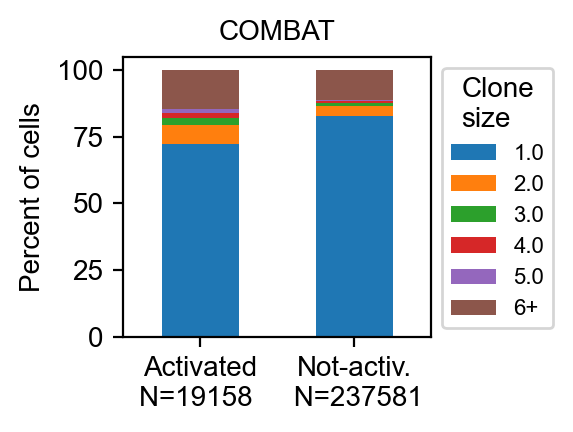

In [36]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']  # Example colors for 1, 2, 3, 4, '5+'

# Plotting with specified colors
fig, ax = plt.subplots(figsize=(2.8, 2), dpi=200, gridspec_kw={'left':.2, 'right':.75, 'bottom':.2, 'top':.9})
(ctfrac*100).plot(kind='bar', stacked=True, ax=ax)
ax.legend(bbox_to_anchor=(1,1), fontsize=8, title='Clone\nsize')
ax.set_ylabel('Percent of cells', fontsize=10)
ax.set_xlabel('', fontsize=10)

ax.set_xticklabels(['Activated\nN=19158 ', 'Not-activ.\n N=237581'], fontsize=10, rotation=0)
ax.set_title('COMBAT', fontsize=10)

plt.savefig(os.path.join(figdir, 'ClonalityVsActivation.%s.png' % dataset))
plt.savefig(os.path.join(figdir, 'ClonalityVsActivation.%s.pdf' % dataset))

In [37]:
ct = pd.crosstab(activation_cov['Proliferation_Status_Label'],activation_cov['Clone_Size_Bin'])
ctfrac = ct.div(ct.sum(axis=1), axis=0)
ctfrac

Clone_Size_Bin,1.0,2.0,3.0,4.0,5.0,6+
Proliferation_Status_Label,,,,,,
Not prolif.,0.821507,0.038141,0.013019,0.007195,0.006309,0.113828
Prolif.,0.627907,0.087932,0.035228,0.027659,0.016651,0.204624


Text(0.5, 0, '')

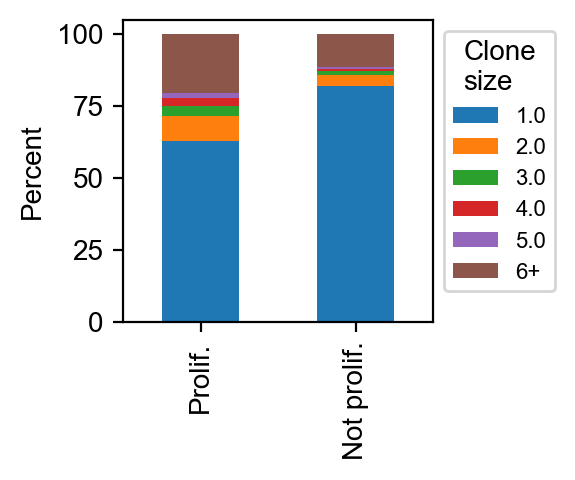

In [38]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']  # Example colors for 1, 2, 3, 4, '5+'

# Plotting with specified colors
fig, ax = plt.subplots(figsize=(2, 2), dpi=200)
(ctfrac.loc[['Prolif.', 'Not prolif.'], :]*100).plot(kind='bar', stacked=True, ax=ax, )
ax.legend(bbox_to_anchor=(1,1), fontsize=8, title='Clone\nsize')
ax.set_ylabel('Percent', fontsize=10)
ax.set_xlabel('', fontsize=10)

In [39]:
ct = pd.crosstab(activation_cov['Activation_Status_Label'], activation_cov['Proliferation_Status_Label'])
ct = ct.loc[['Not-activated', 'Activated'], :]
ct

Proliferation_Status_Label,Not prolif.,Prolif.
Activation_Status_Label,,
Not-activated,244804,1255
Activated,22225,6432


In [40]:
fisher_exact(ct)

(56.45196323367946, 0.0)

In [41]:
ct.loc['Activated', :]

Proliferation_Status_Label
Not prolif.    22225
Prolif.         6432
Name: Activated, dtype: int64

In [42]:
ct.loc['Activated', :].sum()

28657

In [43]:
ct.loc['Activated', :] / ct.loc['Activated', :].sum()

Proliferation_Status_Label
Not prolif.    0.775552
Prolif.        0.224448
Name: Activated, dtype: float64

# UK-COVID 

In [44]:
dataset = 'UK-Covid'
individual_col = params.loc[dataset, 'individual_col']
sample_col = params.loc[dataset, 'sample_col']

In [45]:
count_fn = params.loc[dataset, 'raw_counts_filt_fn']
adata = sc.read(count_fn)

Only considering the two last: ['.ADTfixedADT_70FiltForcNMF', '.h5ad'].
Only considering the two last: ['.ADTfixedADT_70FiltForcNMF', '.h5ad'].


In [46]:
usage = pd.read_csv(params.loc[dataset, 'tcat_fn'], index_col = 0, sep = '\t')
usage.columns = usage.columns.map(rename_map)
usage_norm = usage.div(usage.sum(axis=1), axis=0)

In [47]:
activation = pd.read_csv(params.loc[dataset, 'activation_score_fn'], index_col = 0, sep = '\t')
activation_score = activation['Activation_Score']
activation['Activation_Status'] = activation['Activation_Score'] > activation_threshold
activation = pd.merge(left=activation, right=adata.obs[[individual_col, sample_col,  'Status_on_day_collection_summary']], how='left', left_index=True, right_index=True)
activation['CellCycle_Usage'] = usage_norm.loc[activation.index, cc_geps].sum(axis=1)
activation['CellCycle_Bin'] = activation['CellCycle_Usage']>activation_threshold

In [48]:
tcrdata = pd.read_csv('../../../Data/PerDataset/UKCOVID/TCR_merged/TCR_merged-Updated.tsv', sep='\t')
tcrdata.head()

/PHShome/dk718/miniforge3/envs/cnmf_env2v3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3524: DtypeWarning: Columns (38,39,40) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,CellID,Centre,barcode,is_cell,contig_id,high_confidence,length,chain,v_gene,d_gene,...,Days_from_onset,time_after_LPS,Worst_Clinical_Status,Outcome,leiden,consensus,initial_clustering,study_id,AgeRange,Age
0,AAACCTGAGAAACCTA-MH9179824,Newcastle,AAACCTGAGAAACCTA-1,True,AAACCTGAGAAACCTA-1_contig_2,True,512,TRB,TRBV5-1,None,...,8,NaN,Moderate,Home,26,CD8,CD8,COVID-014,"(50, 59]",54
1,AAACCTGAGAAACCTA-MH9179824,Newcastle,AAACCTGAGAAACCTA-1,True,AAACCTGAGAAACCTA-1_contig_1,True,573,TRA,TRAV8-4,None,...,8,NaN,Moderate,Home,26,CD8,CD8,COVID-014,"(50, 59]",54
2,AAACCTGAGAACAATC-MH9143324,Newcastle,AAACCTGAGAACAATC-1,True,AAACCTGAGAACAATC-1_contig_1,True,635,TRB,TRBV19,None,...,16,NaN,Moderate,Home,25,gdT,gdT,COVID-029,"(20, 29]",26
3,AAACCTGAGAACTCGG-MH8919329,Newcastle,AAACCTGAGAACTCGG-1,True,AAACCTGAGAACTCGG-1_contig_1,True,499,TRA,TRAV34,None,...,5,NaN,Death,Death,23,Treg,Treg,COVID-045,"(70, 79]",77
4,AAACCTGAGAACTCGG-MH8919329,Newcastle,AAACCTGAGAACTCGG-1,True,AAACCTGAGAACTCGG-1_contig_2,True,496,TRB,TRBV5-1,None,...,5,NaN,Death,Death,23,Treg,Treg,COVID-045,"(70, 79]",77


In [49]:
activation = pd.merge(left=activation, right=tcrdata[['CellID', 'cdr3']], left_index=True, right_on='CellID', how='left')
activation.head()

,Activation_Score,Activation_Status,patient_id,sample_id,Status_on_day_collection_summary,CellCycle_Usage,CellCycle_Bin,CellID,cdr3
0.0,0.068290,True,MH9179824,MH9179824,Moderate,0.008362,False,AAACCTGAGAAACCTA-MH9179824,CASSARGASGERTDTQYF
1.0,0.068290,True,MH9179824,MH9179824,Moderate,0.008362,False,AAACCTGAGAAACCTA-MH9179824,CAVSVVRNNNARLMF
34.0,0.036078,False,MH9179824,MH9179824,Moderate,0.003925,False,AAACCTGAGAGTAATC-MH9179824,CAFMKRTNNAGNMLTF
35.0,0.036078,False,MH9179824,MH9179824,Moderate,0.003925,False,AAACCTGAGAGTAATC-MH9179824,CATSSNRYQPQHF
44.0,0.083498,True,MH9179824,MH9179824,Moderate,0.021557,False,AAACCTGAGAGTGAGA-MH9179824,CAVRDRAGGGNKLTF


In [50]:
activation['Status_on_day_collection_summary'].value_counts()

Moderate        120817
Mild            103064
Healthy          91885
Critical         50415
Severe           48853
Asymptomatic     31530
Non_covid        12555
LPS_90mins        2195
LPS_10hours       1949
Name: Status_on_day_collection_summary, dtype: int64

In [51]:
activation_cov = activation.loc[activation['Status_on_day_collection_summary'].isin(['Moderate', 'Mild', 'Critical', 'Severe']), :]
vc = pd.DataFrame(activation_cov['cdr3'].value_counts().dropna())
vc.columns=['Clone_Size']

activation_cov = pd.merge(left=activation_cov, right=vc, left_on='cdr3', right_index=True, how='left')
activation_cov['Is_NonUnique'] = activation_cov['Clone_Size']>1
activation_cov.loc[activation_cov['Clone_Size'].isnull(), 'Is_NonUnique'] = np.nan

allsampeclonecount = []
for (k,g) in activation_cov.groupby('patient_id'):
    sampclonecount = g['cdr3'].astype(str).value_counts()
    if 'nan' in sampclonecount.index:
        sampclonecount = sampclonecount.drop('nan')
                                  
    sampclonecount = pd.DataFrame(sampclonecount)
    sampclonecount['patient_id'] = k
    allsampeclonecount.append(sampclonecount)
allsampeclonecount = pd.concat(allsampeclonecount, axis=0).reset_index()
allsampeclonecount.columns = ['cdr3', 'PerSamp_Clone_Count', 'patient_id']

activation_cov = pd.merge(left=activation_cov, right=allsampeclonecount, left_on=['patient_id', 'cdr3'],
                          right_on=['patient_id', 'cdr3'], how='left')


activation_cov['Is_Clonal'] = activation_cov['PerSamp_Clone_Count']>1
activation_cov.loc[activation_cov['PerSamp_Clone_Count'].isnull(), 'Is_Clonal'] = np.nan

activation_cov.head(10)

,Activation_Score,Activation_Status,patient_id,sample_id,Status_on_day_collection_summary,CellCycle_Usage,CellCycle_Bin,CellID,cdr3,Clone_Size,Is_NonUnique,PerSamp_Clone_Count,Is_Clonal
0,0.068290,True,MH9179824,MH9179824,Moderate,0.008362,False,AAACCTGAGAAACCTA-MH9179824,CASSARGASGERTDTQYF,60.0,True,60.0,True
1,0.068290,True,MH9179824,MH9179824,Moderate,0.008362,False,AAACCTGAGAAACCTA-MH9179824,CAVSVVRNNNARLMF,59.0,True,59.0,True
2,0.036078,False,MH9179824,MH9179824,Moderate,0.003925,False,AAACCTGAGAGTAATC-MH9179824,CAFMKRTNNAGNMLTF,1.0,False,1.0,False
3,0.036078,False,MH9179824,MH9179824,Moderate,0.003925,False,AAACCTGAGAGTAATC-MH9179824,CATSSNRYQPQHF,1.0,False,1.0,False
4,0.083498,True,MH9179824,MH9179824,Moderate,0.021557,False,AAACCTGAGAGTGAGA-MH9179824,CAVRDRAGGGNKLTF,4.0,True,4.0,True
5,0.083498,True,MH9179824,MH9179824,Moderate,0.021557,False,AAACCTGAGAGTGAGA-MH9179824,CASSQTDSGNTIYF,6.0,True,6.0,True
6,0.042048,False,MH9179824,MH9179824,Moderate,0.010646,False,AAACCTGAGGAATCGC-MH9179824,CAATGSGGGADGLTF,2.0,True,2.0,True
7,0.042048,False,MH9179824,MH9179824,Moderate,0.010646,False,AAACCTGAGGAATCGC-MH9179824,CASRHGTGYEQYF,2.0,True,2.0,True
8,0.120738,True,MH9179824,MH9179824,Moderate,0.016728,False,AAACCTGAGTGTTGAA-MH9179824,CASSLYRGATSTDTQYF,2.0,True,2.0,True
9,0.120738,True,MH9179824,MH9179824,Moderate,0.016728,False,AAACCTGAGTGTTGAA-MH9179824,CATDEGASGTYKYIF,1.0,False,1.0,False


In [52]:
ct = pd.crosstab(activation_cov['Activation_Status'], activation_cov['Is_NonUnique'])
OR, P = fisher_exact(ct)
print(OR, P)
ct

1.4886602117207144 0.0


Is_NonUnique,False,True
Activation_Status,,
False,129832,79683
True,34522,31541


In [53]:
ct = pd.crosstab(activation_cov['Activation_Status'], activation_cov['Is_Clonal'])
OR, P = fisher_exact(ct)
print(OR, P)
ct

1.6633495741991022 0.0


Is_Clonal,False,True
Activation_Status,,
False,152403,57112
True,40696,25367


In [54]:
ct = pd.crosstab(activation_cov['CellCycle_Bin'], activation_cov['Is_Clonal'])
OR, P = fisher_exact(ct)
print(OR, P)
ct

1.903877839037556 3.996446185103527e-34


Is_Clonal,False,True
CellCycle_Bin,,
False,192262,81801
True,837,678


In [55]:
ind = ~activation_cov['Is_Clonal'].isnull()
X = sm.add_constant(activation_cov.loc[ind, ['Activation_Score', 'CellCycle_Usage']].astype(float))
y = activation_cov.loc[ind, 'Is_Clonal'].astype(float)
model = sm.Logit(y, X)
result = model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.606090
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Is_Clonal   No. Observations:               275578
Model:                          Logit   Df Residuals:                   275575
Method:                           MLE   Df Model:                            2
Date:                Wed, 17 Apr 2024   Pseudo R-squ.:                0.006842
Time:                        13:18:20   Log-Likelihood:            -1.6703e+05
converged:                       True   LL-Null:                   -1.6818e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -1.0746      0.007   -153.928      0.000      -1.088      -1.061
Activation_Score     4.7380      0.100     47.497      0.000       4.543       4.934
CellCycle_Usage     -1.3576      0.256     -5.303      0.000      -1.859      -0.856
====================================================================================
"""

In [56]:
ind = ~activation_cov['Is_Clonal'].isnull()
X = sm.add_constant(activation_cov.loc[ind, [ 'CellCycle_Usage']].astype(float))
y = activation_cov.loc[ind, 'Is_Clonal'].astype(float)
model = sm.Logit(y, X)
result = model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.610262
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Is_Clonal   No. Observations:               275578
Model:                          Logit   Df Residuals:                   275576
Method:                           MLE   Df Model:                            1
Date:                Wed, 17 Apr 2024   Pseudo R-squ.:               5.286e-06
Time:                        13:18:21   Log-Likelihood:            -1.6817e+05
converged:                       True   LL-Null:                   -1.6818e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1824
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.8471      0.005   -171.771      0.000      -0.857      -0.837
CellCycle_Usage    -0.3194      0.241     -1.324      0.186      -0.792       0.154
===================================================================================
"""

In [57]:
ind = ~activation_cov['Is_Clonal'].isnull()
X = sm.add_constant(activation_cov.loc[ind, ['Activation_Status', 'CellCycle_Bin']].astype(float))
y = activation_cov.loc[ind, 'Is_Clonal'].astype(float)
model = sm.Logit(y, X)
result = model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.604863
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Is_Clonal   No. Observations:               275578
Model:                          Logit   Df Residuals:                   275575
Method:                           MLE   Df Model:                            2
Date:                Wed, 17 Apr 2024   Pseudo R-squ.:                0.008853
Time:                        13:18:23   Log-Likelihood:            -1.6669e+05
converged:                       True   LL-Null:                   -1.6818e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.9836      0.005   -200.241      0.000      -0.993      -0.974
Activation_Status     0.5048      0.009     53.721      0.000       0.486       0.523
CellCycle_Bin         0.5180      0.052      9.906      0.000       0.416       0.621
=====================================================================================
"""

In [58]:
result.pvalues

const                0.000000e+00
Activation_Status    0.000000e+00
CellCycle_Bin        3.922043e-23
dtype: float64

In [257]:
x = activation_cov.loc[activation_cov['Activation_Status']==True, 'PerSamp_Clone_Count'].dropna()
y = activation_cov.loc[activation_cov['Activation_Status']==False, 'PerSamp_Clone_Count'].dropna()
mannwhitneyu(x, y)

MannwhitneyuResult(statistic=4428119993.5, pvalue=0.0)

In [258]:
x = activation_cov.loc[activation_cov['CellCycle_Bin']==True, 'PerSamp_Clone_Count'].dropna()
y = activation_cov.loc[activation_cov['CellCycle_Bin']==False, 'PerSamp_Clone_Count'].dropna()
mannwhitneyu(x, y)

MannwhitneyuResult(statistic=237682890.0, pvalue=2.5098108714312318e-33)

In [261]:
activation_cov['Activation_Status_Label'] = activation_cov['Activation_Status'].replace({True:'Activated', False:'Not-activated'})
activation_cov['Proliferation_Status_Label'] = activation_cov['CellCycle_Bin'].replace({True:'Prolif.', False:'Not prolif.'})

In [262]:
activation_cov['Clone_Size_Bin'] = activation_cov['PerSamp_Clone_Count'].copy()
activation_cov.loc[activation_cov['Clone_Size_Bin']>5, 'Clone_Size_Bin'] = '6+'

In [263]:
ct = pd.crosstab(activation_cov['Activation_Status_Label'],activation_cov['Clone_Size_Bin'])
ctfrac = ct.div(ct.sum(axis=1), axis=0)
ctfrac

Clone_Size_Bin,1.0,2.0,3.0,4.0,5.0,6+
Activation_Status_Label,,,,,,
Activated,0.531310,0.052384,0.021941,0.018439,0.012071,0.363855
Not-activated,0.721391,0.049314,0.016206,0.009557,0.006283,0.197249


In [264]:
ct.sum(axis=1)

Activation_Status_Label
Activated         29990
Not-activated    245588
dtype: int64

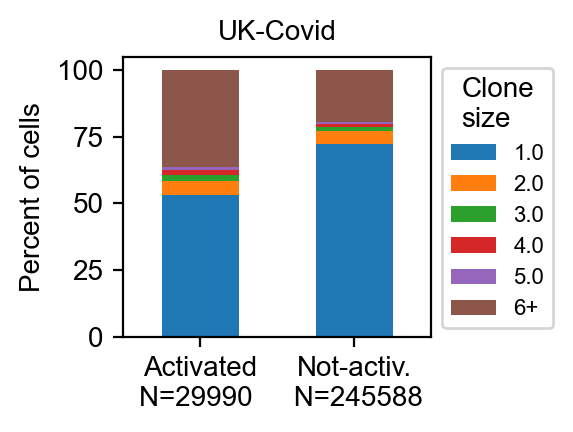

In [265]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']  # Example colors for 1, 2, 3, 4, '5+'

# Plotting with specified colors
fig, ax = plt.subplots(figsize=(2.8, 2), dpi=200, gridspec_kw={'left':.2, 'right':.75, 'bottom':.2, 'top':.9})
(ctfrac*100).plot(kind='bar', stacked=True, ax=ax)
ax.legend(bbox_to_anchor=(1,1), fontsize=8, title='Clone\nsize')
ax.set_ylabel('Percent of cells', fontsize=10)
ax.set_xlabel('', fontsize=10)

ax.set_xticklabels(['Activated\nN=29990 ', 'Not-activ.\n N=245588'], fontsize=10, rotation=0)
ax.set_title('UK-Covid', fontsize=10)

plt.savefig(os.path.join(figdir, 'ClonalityVsActivation.%s.png' % dataset))
plt.savefig(os.path.join(figdir, 'ClonalityVsActivation.%s.pdf' % dataset))

# Scratch

In [60]:
activation_healthy = activation.loc[activation['Source'].isin(['HV']), :]
vc = pd.DataFrame(activation_healthy['TCR_clone_ID'].value_counts().drop('nan'))
vc.columns=['Clone_Size']

activation_healthy = pd.merge(left=activation_healthy, right=vc, left_on='TCR_clone_ID', right_index=True, how='left')
activation_healthy['Is_NonUnique'] = activation_healthy['Clone_Size']>1
activation_healthy.loc[activation_healthy['Clone_Size'].isnull(), 'Is_NonUnique'] = np.nan
activation_healthy.head(10)

,Activation_Score,Activation_Status,TCR_clone_ID,COMBAT_ID,COMBAT_participant_timepoint_ID,Source,Clone_Size,Is_NonUnique
AAACCTGCATCTATGG-1-gPlexA1,0.011637,False,TRA_CAVREAAGNKLTF-TRB_CASSEQGSSYEQYF,H00067,H00067-Ha001,HV,3.0,True
AAACCTGTCAGAGCTT-1-gPlexA1,0.017042,False,TRA_CAVPPDGATNKLIF-TRB_CASSLLGQGDTEAFF,H00067,H00067-Ha001,HV,1.0,False
AAACCTGTCGGTTCGG-1-gPlexA1,0.000557,False,TRA_CAVRKLIF-TRB_CATSRGQGRGVETQYF,H00067,H00067-Ha001,HV,1312.0,True
AAACGGGAGCCCTAAT-1-gPlexA1,0.069565,True,TRA_CALLRSGGFKTIF-TRB_CASSLEGNTIYF,H00067,H00067-Ha001,HV,1.0,False
AAAGATGAGAGCTGGT-1-gPlexA1,0.002170,False,TRA_CAVRKLIF-TRB_CATSRGQGRGVETQYF,H00067,H00067-Ha001,HV,1312.0,True
AAAGATGCACATGTGT-1-gPlexA1,0.014752,False,TRA_CAVRKLIF-TRB_CATSRGQGRGVETQYF,H00067,H00067-Ha001,HV,1312.0,True
AAAGATGCAGCCAATT-1-gPlexA1,0.007152,False,TRA_CAGPGATNKLIF-TRA2_CLVGAAHTGGFKTIF-TRB_CASR...,H00067,H00067-Ha001,HV,1.0,False
AAAGATGCAGCTTCGG-1-gPlexA1,0.012668,False,TRA_CAAEGGGNKLTF-TRB_CASSTADTQYF,H00067,H00067-Ha001,HV,1.0,False
AAAGATGGTAGCTGCC-1-gPlexA1,0.001449,False,TRA_CAVKDSNYQLIW,H00067,H00067-Ha001,HV,5.0,True
AAAGATGTCCGTACAA-1-gPlexA1,0.002452,False,TRA_CAVRKLIF,H00067,H00067-Ha001,HV,155.0,True


In [61]:
ct = pd.crosstab(activation_healthy['Activation_Status'], activation_healthy['Is_NonUnique'])
print(fisher_exact(ct))
ct

(0.3722475478411952, 3.782040782883698e-39)


Is_NonUnique,False,True
Activation_Status,,
False,34792,11785
True,1261,159


In [18]:
meta_fn = params.loc[dataset, 'metadata_fn']
meta = pd.read_csv(meta_fn, index_col = 0, sep = '\t')

In [370]:
activation = pd.read_csv(params.loc[dataset, 'activation_score_fn'], index_col = 0, sep = '\t')
activation_score = activation['Activation_Score']

In [371]:
activated_cells = activation['Activation_Status'] 

In [222]:
cc_geps = ['CellCycle-G2M', 'CellCycle-S', 'CellCycle-Late-S']

cc_score = usage_norm[cc_geps].sum(axis = 1)
cc_threshold = 0.1

prolif_cells = cc_score > cc_threshold
cc = pd.concat([cc_score, prolif_cells], axis = 1)
cc.columns = ['CC_Score', 'CC_Status']


In [392]:
# gating_act_all = {}

for dataset in ['COMBAT']:
    gating_act = pd.read_csv(params.loc[dataset, 'manual_activation_gating_fn'],
                             index_col = 0, sep = '\t')
    
#     if dataset == 'Stimseq':
#         activation_cluster = pd.read_csv('../../../Data/PerDataset/Stimseq/ActivationByClustering.tsv', 
#                                          index_col = 0, sep = '\t')

#         gating_act_all[dataset]['Activated'] = activation_cluster.loc[gating_act_all[dataset].index, 
#                                                                       'Activation_Cluster_ByLineage']

In [393]:
gating_act['Class']

,Class,Activated
AAACCTGAGCGGATCA-1-gPlexA1,CD8,Unactivated
AAACCTGCAGCTCGAC-1-gPlexA1,CD4,Unactivated
AAACCTGCATCTATGG-1-gPlexA1,CD4,Unactivated
AAACCTGGTCTCTCTG-1-gPlexA1,CD4,Unactivated
AAACCTGTCACCGGGT-1-gPlexA1,CD8,Activated
...,...,...
TTTGGTTTCCTCAACC-1-gPlexK7,CD4,Unactivated
TTTGGTTTCTCGATGA-1-gPlexK7,CD4,Unactivated
TTTGTCACACCACGTG-1-gPlexK7,CD8,Unactivated
TTTGTCAGTTACCGAT-1-gPlexK7,CD8,Unactivated


In [ ]:
adata

AnnData object with n_obs × n_vars = 399599 × 20807
    obs: 'Annotation_cluster_name', 'Annotation_minor_subset', 'Annotation_major_subset', 'Annotation_cell_type', 'GEX_region', 'QC_ngenes', 'QC_total_UMI', 'QC_pct_mitochondrial', 'QC_scrub_doublet_scores', 'TCR_chain_composition', 'TCR_clone_ID', 'TCR_clone_count', 'TCR_clone_proportion', 'TCR_contains_unproductive', 'TCR_doublet', 'TCR_chain_TRA', 'TCR_v_gene_TRA', 'TCR_d_gene_TRA', 'TCR_j_gene_TRA', 'TCR_c_gene_TRA', 'TCR_productive_TRA', 'TCR_cdr3_TRA', 'TCR_umis_TRA', 'TCR_chain_TRA2', 'TCR_v_gene_TRA2', 'TCR_d_gene_TRA2', 'TCR_j_gene_TRA2', 'TCR_c_gene_TRA2', 'TCR_productive_TRA2', 'TCR_cdr3_TRA2', 'TCR_umis_TRA2', 'TCR_chain_TRB', 'TCR_v_gene_TRB', 'TCR_d_gene_TRB', 'TCR_j_gene_TRB', 'TCR_c_gene_TRB', 'TCR_productive_TRB', 'TCR_chain_TRB2', 'TCR_v_gene_TRB2', 'TCR_d_gene_TRB2', 'TCR_j_gene_TRB2', 'TCR_c_gene_TRB2', 'TCR_productive_TRB2', 'TCR_cdr3_TRB2', 'TCR_umis_TRB2', 'COMBAT_ID', 'scRNASeq_sample_ID', 'COMBAT_participant_t

In [61]:
unique_tcrs = meta.loc[meta[['TCR_clone_ID', individual_col]].drop_duplicates().index, :]
unique_tcrs = unique_tcrs.reset_index(drop = True)
unique_tcrs = unique_tcrs.loc[:, np.logical_or(unique_tcrs.columns.str.contains('TCR'), 
                                               (unique_tcrs.columns==individual_col))]

In [113]:
unique_tcrs.groupby(individual_col).sum()['TCR_clone_proportion'].mean()

1.0256608020919016

In [114]:
unique_tcrs.groupby(individual_col).sum()['TCR_clone_proportion'].max()

2.1955309894791784

In [115]:
unique_tcrs

,TCR_chain_composition,TCR_clone_ID,TCR_clone_count,TCR_clone_proportion,TCR_contains_unproductive,TCR_doublet,TCR_chain_TRA,TCR_v_gene_TRA,TCR_d_gene_TRA,TCR_j_gene_TRA,...,TCR_productive_TRB,TCR_chain_TRB2,TCR_v_gene_TRB2,TCR_d_gene_TRB2,TCR_j_gene_TRB2,TCR_c_gene_TRB2,TCR_productive_TRB2,TCR_cdr3_TRB2,TCR_umis_TRB2,COMBAT_ID
0,double_alpha_beta,TRA_CAVGDQTGANNLFF-TRB_CASSLRSGTSYF,54.0,0.015323,0.0,0.0,TRA,TRAV3*01,None,TRAJ36*01,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S00112
1,double_alpha_beta,TRA_CADNFNKFYF-TRB_CASSESPGHSPLHF,1.0,0.000130,0.0,0.0,TRA,TRAV27*01,None,TRAJ21*01,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S00005
2,double_alpha_beta,TRA_CAVREAAGNKLTF-TRB_CASSEQGSSYEQYF,3.0,0.000432,1.0,0.0,TRA,TRAV1-1*01,None,TRAJ17*01,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,H00067
3,double_alpha_beta,TRA_CAAIILKAGNNRKLIW-TRB_CASSLPGQISSSYTF,1.0,0.000407,0.0,0.0,TRA,TRAV29/DV5*01,None,TRAJ38*01,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N00027
4,double_alpha_beta,TRA_CAMTPGGGADGLTF-TRB_CASGIGGLGNTEAFF,38.0,0.005520,0.0,0.0,TRA,TRAV12-3*01,None,TRAJ45*01,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,U00515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312455,double_alpha_beta,TRA_CAAGGSQGNLIF-TRB_CASSVGTGGIEQFF,1.0,0.000216,0.0,0.0,TRA,TRAV13-1*01,None,TRAJ42*01,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N00038
312456,double_alpha_beta,TRA_CAVDMKVYSGGGADGLTF-TRB_CSAPRLAGGWWETQYF,1.0,0.000511,0.0,0.0,TRA,TRAV39*01,None,TRAJ45*01,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S00048
312457,double_alpha_beta,TRA_CARWAGGFKTIF-TRB_CASSSPGLGDEQFF,1.0,0.000216,0.0,0.0,TRA,TRAV9-2*01,None,TRAJ9*01,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N00038
312458,double_alpha_beta,TRA_CAFEPNSGYALNF-TRB_CASSPETYEQYF,3.0,0.001196,1.0,0.0,TRA,TRAV38-2/DV8*01,None,TRAJ41*01,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S00057


In [199]:
# Rename for pyTCR input
df = unique_tcrs.copy()

df.head(2)

,TCR_chain_composition,TCR_clone_ID,TCR_clone_count,TCR_clone_proportion,TCR_contains_unproductive,TCR_doublet,TCR_chain_TRA,TCR_v_gene_TRA,TCR_d_gene_TRA,TCR_j_gene_TRA,...,TCR_productive_TRB,TCR_chain_TRB2,TCR_v_gene_TRB2,TCR_d_gene_TRB2,TCR_j_gene_TRB2,TCR_c_gene_TRB2,TCR_productive_TRB2,TCR_cdr3_TRB2,TCR_umis_TRB2,COMBAT_ID
0,double_alpha_beta,TRA_CAVGDQTGANNLFF-TRB_CASSLRSGTSYF,54.0,0.015323,0.0,0.0,TRA,TRAV3*01,None,TRAJ36*01,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S00112
1,double_alpha_beta,TRA_CADNFNKFYF-TRB_CASSESPGHSPLHF,1.0,0.000130,0.0,0.0,TRA,TRAV27*01,None,TRAJ21*01,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S00005


In [200]:
rename_col = {individual_col : 'sample', 'TCR_clone_proportion' : 'freq', 'TCR_clone_count' : '#count'}

df = df.rename(columns = rename_col)

df = df.loc[df[['sample', 'freq', '#count']].dropna().index, :].copy()

In [201]:
optional_fields = []


In [202]:
df

,TCR_chain_composition,TCR_clone_ID,#count,freq,TCR_contains_unproductive,TCR_doublet,TCR_chain_TRA,TCR_v_gene_TRA,TCR_d_gene_TRA,TCR_j_gene_TRA,...,TCR_productive_TRB,TCR_chain_TRB2,TCR_v_gene_TRB2,TCR_d_gene_TRB2,TCR_j_gene_TRB2,TCR_c_gene_TRB2,TCR_productive_TRB2,TCR_cdr3_TRB2,TCR_umis_TRB2,sample
0,double_alpha_beta,TRA_CAVGDQTGANNLFF-TRB_CASSLRSGTSYF,54.0,0.015323,0.0,0.0,TRA,TRAV3*01,None,TRAJ36*01,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S00112
1,double_alpha_beta,TRA_CADNFNKFYF-TRB_CASSESPGHSPLHF,1.0,0.000130,0.0,0.0,TRA,TRAV27*01,None,TRAJ21*01,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S00005
2,double_alpha_beta,TRA_CAVREAAGNKLTF-TRB_CASSEQGSSYEQYF,3.0,0.000432,1.0,0.0,TRA,TRAV1-1*01,None,TRAJ17*01,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,H00067
3,double_alpha_beta,TRA_CAAIILKAGNNRKLIW-TRB_CASSLPGQISSSYTF,1.0,0.000407,0.0,0.0,TRA,TRAV29/DV5*01,None,TRAJ38*01,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N00027
4,double_alpha_beta,TRA_CAMTPGGGADGLTF-TRB_CASGIGGLGNTEAFF,38.0,0.005520,0.0,0.0,TRA,TRAV12-3*01,None,TRAJ45*01,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,U00515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312455,double_alpha_beta,TRA_CAAGGSQGNLIF-TRB_CASSVGTGGIEQFF,1.0,0.000216,0.0,0.0,TRA,TRAV13-1*01,None,TRAJ42*01,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N00038
312456,double_alpha_beta,TRA_CAVDMKVYSGGGADGLTF-TRB_CSAPRLAGGWWETQYF,1.0,0.000511,0.0,0.0,TRA,TRAV39*01,None,TRAJ45*01,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S00048
312457,double_alpha_beta,TRA_CARWAGGFKTIF-TRB_CASSSPGLGDEQFF,1.0,0.000216,0.0,0.0,TRA,TRAV9-2*01,None,TRAJ9*01,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N00038
312458,double_alpha_beta,TRA_CAFEPNSGYALNF-TRB_CASSPETYEQYF,3.0,0.001196,1.0,0.0,TRA,TRAV38-2/DV8*01,None,TRAJ41*01,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S00057


In [203]:
# Create a dataframe with reads count for each sample
df_reads = df.groupby(['sample']).agg(
    {'#count': 'sum'}).reset_index().rename(columns={'#count': "count"})


# Create a dataframe with clonotype count for each sample
df_diversity = df.groupby(['sample'], sort=False).size().reset_index(name='clonotype_count')


In [204]:
# Add clonotype count of each sample as a column to create a new dataframe
df = pd.merge(df, df_diversity, on=['sample'])


In [205]:
df_reads

,sample,count
0,G05061,2990.0
1,G05064,5644.0
2,G05073,5175.0
3,G05077,2406.0
4,G05078,5274.0
...,...,...
117,U00607,124.0
118,U00613,406.0
119,U00617,661.0
120,U00619,1015.0


In [206]:
df_diversity

,sample,clonotype_count
0,S00112,2873
1,S00005,11288
2,H00067,3600
3,N00027,1938
4,U00515,5331
...,...,...
117,N00037,1665
118,U00502,569
119,U00501,761
120,S00065,1477


## All Cells - PyTCR diversity analyses

Diversity analysis 1 - Shannon-Wiener index [shannon_wiener_index]

In [207]:

# Calculation step 1
df['shannon_index'] = -(df['freq']*np.log(df['freq']))


# Calculation step 2
df_shannon = df.groupby(['sample']).agg(
    {'shannon_index': 'sum'}).reset_index().rename(columns={'': "shannon_index"})


# Calculation step 3, Shannon-Wienex index is shown in the shannon_wiener_index column
df_shannon['shannon_wiener_index'] = np.exp(df_shannon['shannon_index'])
df_shannon_index = df_shannon[['sample', 'shannon_wiener_index']]


Diversity analysis 2 - Normalized Shannon-Wiener index [normalized_shannon_wiener_index]



In [208]:
# Calculation step 1 - merge df_shannon and df_diversity (which contains clonotype counts)
df_shannon = pd.merge(df_shannon, df_diversity, on=[
                      'sample'])


# Calculation step 2 - calculate normalized Shannon-Wienex index, it is shown in the normalized_shannon_wiener_index column
df_shannon['normalized_shannon_wiener_index'] = df_shannon['shannon_index'] / \
    np.log(df_shannon['clonotype_count'])



df_norm_shannon = df_shannon[['sample','shannon_wiener_index', 'normalized_shannon_wiener_index']]


Diversity analysis 3 - Inverse Simpson index [inverse_simpson_index]

In [209]:
# Calculation step 1
df['simpson_index'] = (df['freq']**2)

# Calculation step 2
df_simpson = df.groupby(['sample']).agg(
    {'simpson_index': 'sum'}).reset_index().rename(columns={'': "simpson_index"})

# Calculation step 3, Inverse Simpson index is shown in the inverse_simpson_index column
df_simpson['inverse_simpson_index'] = 1/df_simpson['simpson_index']


Diversity analysis 4 - Gini Simpson index [gini_simpson_index]

In [210]:
df_simpson['gini_simpson_index'] = 1-df_simpson['simpson_index']

Diversity analysis 5 - D50 index [D50_index]

In [211]:
# Create an empty dataframe for storing results
df_D50 = pd.DataFrame()

# Create a list of the sample names
samples = set(df['sample'])

for sample in samples:

    # Store the rows related to the sample
    df_temp = df.loc[df['sample'] == sample]

    # Sort the sample clonotypes by frequency in descending order
    df_temp = df_temp.sort_values(by='freq', ascending=False)

    # Create a column to store the order
    df_temp['clonotype_number'] = np.arange(df_temp.shape[0])+1

    # Compute and store the cumulative sum of the frequencies
    df_temp['accum_freq'] = df_temp['freq'].cumsum()

    # Find out the first accumulated frequency that is above 50%
    df_temp = df_temp.loc[(df_temp['accum_freq'] >= 0.5)
                          & (df_temp['accum_freq'] <= 0.6)]
    df_temp = df_temp.head(1)

    # Calculate D50 index and store in the result dataframe
    df_temp = df_temp.head(1)
    df_temp['D50_index'] = df_temp['clonotype_number'] / \
        df_temp['clonotype_count']*100
    df_D50 = pd.concat([df_D50, df_temp])

df_D50 = df_D50[['sample', 'D50_index']]


Diversity analysis 6 - Chao1 estimate [chao1] and standard deviation [chao1_SD]

In [212]:
# Create an empty dataframe for storing results
df_chao1 = pd.DataFrame()

# Get the columns needed for calculation from df
df1 = df[['sample', '#count', 'clonotype_count']].copy()

# Create a list of the sample names
samples = set(df1['sample'])

for sample in samples:

    # Store the rows related to the sample
    df_temp = df1.loc[df1['sample'] == sample]

    # Count singleton in the sample
    singleton = len(df_temp.loc[df_temp['#count'] == 1])

    # Count doubleton in the sample
    doubleton = len(df_temp.loc[df_temp['#count'] == 2])

    # Calculate Chao1 estimate
    chao1 = int(df_temp['clonotype_count'].values[0]) + \
        ((singleton * (singleton-1))/(2*(doubleton+1)))
    df_temp['chao1'] = chao1

    # Calculate Chao1 estimate standard deviation
    step1 = 1/4*((singleton/doubleton)**4)
    step2 = (singleton/doubleton)**3
    step3 = 1/2*((singleton/doubleton)**2)
    step4 = doubleton * (step1+step2+step3)
    df_temp['chao1_SD'] = step4**(1/2)

    # Store the results in the result dataframe
    df_chao1 = pd.concat([df_chao1, df_temp], axis=0, sort=False)

    # Remove the duplicates results in the result dataframe
    df_chao1 = df_chao1[['sample', 'chao1', 'chao1_SD']]
    df_chao1 = df_chao1.drop_duplicates(subset=['sample'], keep='first')


/PHShome/mc1070/anaconda3/envs/cnmf_env2v2/lib/python3.7/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/PHShome/mc1070/anaconda3/envs/cnmf_env2v2/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


ZeroDivisionError: division by zero

Diversity analysis 7 - Gini coefficient [gini_coefficient]

In [213]:
# Create an empty dataframe for storing results
df_gini = pd.DataFrame()

# Create a list of the sample names
samples = set(df['sample'])

for sample in samples:

    # Store the rows related to the sample
    df_temp = df.loc[df['sample'] == sample].copy()

    def gini(list_of_values):
        sorted_list = sorted(list_of_values)
        height, area = 0, 0
        for value in sorted_list:
            height += value
            area += height - value / 2.
        fair_area = height * len(list_of_values) / 2.
        return (fair_area - area) / fair_area

    # Calculate gini coefficient
    df_temp['gini_coefficient'] = gini(df_temp['freq'])

    # Store the results in the result dataframe
    df_gini = pd.concat([df_gini, df_temp], sort=False)

    # Remove the duplicates results in the result dataframe
    df_gini = df_gini[['sample', 'gini_coefficient']]
    df_gini = df_gini.drop_duplicates(subset=['sample'], keep='first')


Diversity analysis 8 - Summary table for the diversity analysis

In [215]:
# Create a dataframe that combines all the diversity analysis
dfs = [df_norm_shannon, df_simpson, df_D50, #df_chao1, 
       df_gini]

df_combined = pd.merge(dfs[0], dfs[1], left_on=['sample'], right_on=[
                       'sample'], how='outer')

for d in dfs[2:]:
    df_combined = pd.merge(df_combined, d, left_on=['sample'], right_on=[
                           'sample'], how='outer')

df_combined


,sample,shannon_wiener_index,normalized_shannon_wiener_index,simpson_index,inverse_simpson_index,gini_simpson_index,D50_index,gini_coefficient
0,G05061,1655.236147,0.940610,0.000650,1538.199439,0.999350,46.348846,0.113569
1,G05064,3464.883056,0.949708,0.000268,3734.312633,0.999732,49.765698,0.054227
2,G05073,2198.848302,0.923144,0.001355,738.260508,0.998645,40.690151,0.189214
3,G05077,1056.255091,0.916855,0.001869,535.026020,0.998131,42.950655,0.170632
4,G05078,3185.693995,0.949259,0.000234,4278.478339,0.999766,49.051601,0.068597
...,...,...,...,...,...,...,...,...
117,U00607,76.498787,0.905960,0.006735,148.484848,0.993265,55.833333,0.031183
118,U00613,105.037318,0.853840,0.034509,28.977897,0.965491,15.879828,0.399966
119,U00617,309.728234,0.903880,0.003698,270.430826,0.996302,47.017544,0.135305
120,U00619,636.945387,0.952644,0.002363,423.122909,0.997637,43.849658,0.131554


In [236]:
df_combined_all = {}

In [237]:
df_combined_all['All_Cells'] = df_combined

## Activated Cells only - PyTCR diversity analyses

Should I be recalculating everything when calculating GINI on a subset of the cells.

In [230]:
ind = activated_cells[activated_cells].index

In [365]:
activated_cells.value_counts()

False    368332
True      31267
Name: Activation_Status, dtype: int64

In [238]:
unique_tcrs = meta.loc[meta.loc[ind, :][['TCR_clone_ID', individual_col]].drop_duplicates().index, :]
unique_tcrs = unique_tcrs.reset_index(drop = True)
unique_tcrs = unique_tcrs.loc[:, np.logical_or(unique_tcrs.columns.str.contains('TCR'), 
                                               (unique_tcrs.columns==individual_col))]

In [239]:
unique_tcrs.groupby(individual_col).sum()['TCR_clone_proportion'].mean()

0.16125118411161896

In [240]:
unique_tcrs.groupby(individual_col).sum()['TCR_clone_proportion'].max()

0.5722480156996188

In [241]:
unique_tcrs

,TCR_chain_composition,TCR_clone_ID,TCR_clone_count,TCR_clone_proportion,TCR_contains_unproductive,TCR_doublet,TCR_chain_TRA,TCR_v_gene_TRA,TCR_d_gene_TRA,TCR_j_gene_TRA,...,TCR_productive_TRB,TCR_chain_TRB2,TCR_v_gene_TRB2,TCR_d_gene_TRB2,TCR_j_gene_TRB2,TCR_c_gene_TRB2,TCR_productive_TRB2,TCR_cdr3_TRB2,TCR_umis_TRB2,COMBAT_ID
0,double_alpha_beta,TRA_CAMTPGGGADGLTF-TRB_CASGIGGLGNTEAFF,38.0,0.005520,0.0,0.0,TRA,TRAV12-3*01,None,TRAJ45*01,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,U00515
1,double_alpha_beta,TRA_CAVRKLIF-TRB_CATSRGQGRGVETQYF,1388.0,0.199914,0.0,0.0,TRA,TRAV3*01,None,TRAJ4*01,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,H00067
2,double_alpha_beta,TRA_CALLRSGGFKTIF-TRB_CASSLEGNTIYF,1.0,0.000144,0.0,0.0,TRA,TRAV1-1*01,None,TRAJ9*01,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,H00067
3,double_alpha_beta,TRA_CAHILMNRDDKIIF-TRB_CASRTAGDIGANVLTF,1.0,0.000327,0.0,0.0,TRA,TRAV16*01,None,TRAJ30*01,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S00043
4,triple_2_beta,TRA_CAVSETAAGNKLTF-TRB_CASSFNSRGSNQPQHF-TRB2_C...,1.0,0.000307,1.0,0.0,TRA,TRAV8-6*02,None,TRAJ17*01,...,1.0,TRB,TRBV5-1*01,None,TRBJ2-2*01,TRBC2*01,1.0,TRB2_CASSLEHNTGELFF,7.0,S00056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24871,double_alpha_beta,TRA_CAVVDLSGGSYIPTF-TRB_CSAGADGGYTEAFF,1.0,0.000477,1.0,0.0,TRA,TRAV8-3*01,None,TRAJ6*01,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G05112
24872,double_alpha_beta,TRA_CALIAGGFKTIF-TRB_CASSLAGNTEAFF,1.0,0.000511,1.0,0.0,TRA,TRAV9-2*02,None,TRAJ9*01,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S00048
24873,double_alpha_beta,TRA_CASTRDNYGQNFVF-TRB_CASSILVGRDYGYTF,1.0,0.000511,0.0,0.0,TRA,TRAV25*01,None,TRAJ26*01,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S00048
24874,double_alpha_beta,TRA_CALTRTSGSARQLTF-TRB_CASSFRGGDTQYF,1.0,0.000412,0.0,0.0,TRA,TRAV16*01,None,TRAJ22*01,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N00037


In [244]:
# Rename for pyTCR input
df = unique_tcrs.copy()

df.head(2)

,TCR_chain_composition,TCR_clone_ID,TCR_clone_count,TCR_clone_proportion,TCR_contains_unproductive,TCR_doublet,TCR_chain_TRA,TCR_v_gene_TRA,TCR_d_gene_TRA,TCR_j_gene_TRA,...,TCR_productive_TRB,TCR_chain_TRB2,TCR_v_gene_TRB2,TCR_d_gene_TRB2,TCR_j_gene_TRB2,TCR_c_gene_TRB2,TCR_productive_TRB2,TCR_cdr3_TRB2,TCR_umis_TRB2,COMBAT_ID
0,double_alpha_beta,TRA_CAMTPGGGADGLTF-TRB_CASGIGGLGNTEAFF,38.0,0.005520,0.0,0.0,TRA,TRAV12-3*01,None,TRAJ45*01,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,U00515
1,double_alpha_beta,TRA_CAVRKLIF-TRB_CATSRGQGRGVETQYF,1388.0,0.199914,0.0,0.0,TRA,TRAV3*01,None,TRAJ4*01,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,H00067


In [245]:
rename_col = {individual_col : 'sample', 'TCR_clone_proportion' : 'freq', 'TCR_clone_count' : '#count'}

df = df.rename(columns = rename_col)

df = df.loc[df[['sample', 'freq', '#count']].dropna().index, :].copy()

In [ ]:
optional_fields = []


In [ ]:
df

In [246]:
# Create a dataframe with reads count for each sample
df_reads = df.groupby(['sample']).agg(
    {'#count': 'sum'}).reset_index().rename(columns={'#count': "count"})


# Create a dataframe with clonotype count for each sample
df_diversity = df.groupby(['sample'], sort=False).size().reset_index(name='clonotype_count')


In [247]:
# Add clonotype count of each sample as a column to create a new dataframe
df = pd.merge(df, df_diversity, on=['sample'])


In [248]:
df_reads

,sample,count
0,G05061,226.0
1,G05064,275.0
2,G05073,235.0
3,G05077,202.0
4,G05078,288.0
...,...,...
117,U00607,23.0
118,U00613,125.0
119,U00617,143.0
120,U00619,280.0


In [249]:
df_diversity

,sample,clonotype_count
0,U00515,485
1,H00067,190
2,S00043,418
3,S00056,383
4,S00112,343
...,...,...
117,S00076,137
118,S00072,79
119,N00037,210
120,S00002,87


Diversity analysis 1 - Shannon-Wiener index [shannon_wiener_index]

In [250]:

# Calculation step 1
df['shannon_index'] = -(df['freq']*np.log(df['freq']))


# Calculation step 2
df_shannon = df.groupby(['sample']).agg(
    {'shannon_index': 'sum'}).reset_index().rename(columns={'': "shannon_index"})


# Calculation step 3, Shannon-Wienex index is shown in the shannon_wiener_index column
df_shannon['shannon_wiener_index'] = np.exp(df_shannon['shannon_index'])
df_shannon_index = df_shannon[['sample', 'shannon_wiener_index']]


Diversity analysis 2 - Normalized Shannon-Wiener index [normalized_shannon_wiener_index]



In [251]:
# Calculation step 1 - merge df_shannon and df_diversity (which contains clonotype counts)
df_shannon = pd.merge(df_shannon, df_diversity, on=[
                      'sample'])


# Calculation step 2 - calculate normalized Shannon-Wienex index, it is shown in the normalized_shannon_wiener_index column
df_shannon['normalized_shannon_wiener_index'] = df_shannon['shannon_index'] / \
    np.log(df_shannon['clonotype_count'])



df_norm_shannon = df_shannon[['sample','shannon_wiener_index', 'normalized_shannon_wiener_index']]


Diversity analysis 3 - Inverse Simpson index [inverse_simpson_index]

In [252]:
# Calculation step 1
df['simpson_index'] = (df['freq']**2)

# Calculation step 2
df_simpson = df.groupby(['sample']).agg(
    {'simpson_index': 'sum'}).reset_index().rename(columns={'': "simpson_index"})

# Calculation step 3, Inverse Simpson index is shown in the inverse_simpson_index column
df_simpson['inverse_simpson_index'] = 1/df_simpson['simpson_index']


Diversity analysis 4 - Gini Simpson index [gini_simpson_index]

In [253]:
df_simpson['gini_simpson_index'] = 1-df_simpson['simpson_index']

Diversity analysis 5 - D50 index [D50_index]

In [254]:
# Create an empty dataframe for storing results
df_D50 = pd.DataFrame()

# Create a list of the sample names
samples = set(df['sample'])

for sample in samples:

    # Store the rows related to the sample
    df_temp = df.loc[df['sample'] == sample]

    # Sort the sample clonotypes by frequency in descending order
    df_temp = df_temp.sort_values(by='freq', ascending=False)

    # Create a column to store the order
    df_temp['clonotype_number'] = np.arange(df_temp.shape[0])+1

    # Compute and store the cumulative sum of the frequencies
    df_temp['accum_freq'] = df_temp['freq'].cumsum()

    # Find out the first accumulated frequency that is above 50%
    df_temp = df_temp.loc[(df_temp['accum_freq'] >= 0.5)
                          & (df_temp['accum_freq'] <= 0.6)]
    df_temp = df_temp.head(1)

    # Calculate D50 index and store in the result dataframe
    df_temp = df_temp.head(1)
    df_temp['D50_index'] = df_temp['clonotype_number'] / \
        df_temp['clonotype_count']*100
    df_D50 = pd.concat([df_D50, df_temp])

df_D50 = df_D50[['sample', 'D50_index']]


Diversity analysis 6 - Chao1 estimate [chao1] and standard deviation [chao1_SD]

In [ ]:
# # Create an empty dataframe for storing results
# df_chao1 = pd.DataFrame()

# # Get the columns needed for calculation from df
# df1 = df[['sample', '#count', 'clonotype_count']].copy()

# # Create a list of the sample names
# samples = set(df1['sample'])

# for sample in samples:

#     # Store the rows related to the sample
#     df_temp = df1.loc[df1['sample'] == sample]

#     # Count singleton in the sample
#     singleton = len(df_temp.loc[df_temp['#count'] == 1])

#     # Count doubleton in the sample
#     doubleton = len(df_temp.loc[df_temp['#count'] == 2])

#     # Calculate Chao1 estimate
#     chao1 = int(df_temp['clonotype_count'].values[0]) + \
#         ((singleton * (singleton-1))/(2*(doubleton+1)))
#     df_temp['chao1'] = chao1

#     # Calculate Chao1 estimate standard deviation
#     step1 = 1/4*((singleton/doubleton)**4)
#     step2 = (singleton/doubleton)**3
#     step3 = 1/2*((singleton/doubleton)**2)
#     step4 = doubleton * (step1+step2+step3)
#     df_temp['chao1_SD'] = step4**(1/2)

#     # Store the results in the result dataframe
#     df_chao1 = pd.concat([df_chao1, df_temp], axis=0, sort=False)

#     # Remove the duplicates results in the result dataframe
#     df_chao1 = df_chao1[['sample', 'chao1', 'chao1_SD']]
#     df_chao1 = df_chao1.drop_duplicates(subset=['sample'], keep='first')


Diversity analysis 7 - Gini coefficient [gini_coefficient]

In [213]:
# Create an empty dataframe for storing results
df_gini = pd.DataFrame()

# Create a list of the sample names
samples = set(df['sample'])

for sample in samples:

    # Store the rows related to the sample
    df_temp = df.loc[df['sample'] == sample].copy()

    def gini(list_of_values):
        sorted_list = sorted(list_of_values)
        height, area = 0, 0
        for value in sorted_list:
            height += value
            area += height - value / 2.
        fair_area = height * len(list_of_values) / 2.
        return (fair_area - area) / fair_area

    # Calculate gini coefficient
    df_temp['gini_coefficient'] = gini(df_temp['freq'])

    # Store the results in the result dataframe
    df_gini = pd.concat([df_gini, df_temp], sort=False)

    # Remove the duplicates results in the result dataframe
    df_gini = df_gini[['sample', 'gini_coefficient']]
    df_gini = df_gini.drop_duplicates(subset=['sample'], keep='first')


Diversity analysis 8 - Summary table for the diversity analysis

In [256]:
# Create a dataframe that combines all the diversity analysis
dfs = [df_norm_shannon, df_simpson, df_D50, #df_chao1, 
       df_gini]

df_combined = pd.merge(dfs[0], dfs[1], left_on=['sample'], right_on=[
                       'sample'], how='outer')

for d in dfs[2:]:
    df_combined = pd.merge(df_combined, d, left_on=['sample'], right_on=[
                           'sample'], how='outer')

df_combined


,sample,shannon_wiener_index,normalized_shannon_wiener_index,simpson_index,inverse_simpson_index,gini_simpson_index,D50_index,gini_coefficient
0,G05061,1.669346,0.102269,0.000158,6312.125320,0.999842,NaN,0.113569
1,G05064,1.487450,0.071809,0.000010,103591.374631,0.999990,NaN,0.054227
2,G05073,1.370180,0.064500,0.000088,11342.313741,0.999912,NaN,0.189214
3,G05077,1.807121,0.116594,0.000061,16439.149746,0.999939,NaN,0.170632
4,G05078,1.520706,0.077522,0.000032,31506.749489,0.999968,NaN,0.068597
...,...,...,...,...,...,...,...,...
117,U00607,2.229861,0.259440,0.001276,784.000000,0.998724,NaN,0.031183
118,U00613,4.711712,0.364847,0.002410,415.002398,0.997590,NaN,0.399966
119,U00617,3.222529,0.250419,0.001484,673.773263,0.998516,NaN,0.135305
120,U00619,5.304826,0.312902,0.001445,692.015903,0.998555,NaN,0.131554


In [257]:
df_combined_all['Activated_Cells_Only'] = df_combined

## Proliferating Cells only - PyTCR diversity analyses

In [260]:
ind = prolif_cells[prolif_cells].index

In [366]:
prolif_cells.value_counts()

False    391368
True       8231
dtype: int64

In [261]:
unique_tcrs = meta.loc[meta.loc[ind, :][['TCR_clone_ID', individual_col]].drop_duplicates().index, :]
unique_tcrs = unique_tcrs.reset_index(drop = True)
unique_tcrs = unique_tcrs.loc[:, np.logical_or(unique_tcrs.columns.str.contains('TCR'), 
                                               (unique_tcrs.columns==individual_col))]

In [262]:
unique_tcrs.groupby(individual_col).sum()['TCR_clone_proportion'].mean()

0.07053864836752881

In [263]:
unique_tcrs.groupby(individual_col).sum()['TCR_clone_proportion'].max()

0.4255079006771997

In [264]:
# Rename for pyTCR input
df = unique_tcrs.copy()

df.head(2)

,TCR_chain_composition,TCR_clone_ID,TCR_clone_count,TCR_clone_proportion,TCR_contains_unproductive,TCR_doublet,TCR_chain_TRA,TCR_v_gene_TRA,TCR_d_gene_TRA,TCR_j_gene_TRA,...,TCR_productive_TRB,TCR_chain_TRB2,TCR_v_gene_TRB2,TCR_d_gene_TRB2,TCR_j_gene_TRB2,TCR_c_gene_TRB2,TCR_productive_TRB2,TCR_cdr3_TRB2,TCR_umis_TRB2,COMBAT_ID
0,triple_2_beta,TRA_CAVSETAAGNKLTF-TRB_CASSFNSRGSNQPQHF-TRB2_C...,1.0,0.000307,1.0,0.0,TRA,TRAV8-6*02,None,TRAJ17*01,...,1.0,TRB,TRBV5-1*01,None,TRBJ2-2*01,TRBC2*01,1.0,TRB2_CASSLEHNTGELFF,7.0,S00056
1,double_alpha_beta,TRA_CAVPDSWGKFQF-TRB_CASSARGRDTEAFF,1.0,0.000307,1.0,0.0,TRA,TRAV20*02,None,TRAJ24*03,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S00056


In [265]:
rename_col = {individual_col : 'sample', 'TCR_clone_proportion' : 'freq', 'TCR_clone_count' : '#count'}

df = df.rename(columns = rename_col)

df = df.loc[df[['sample', 'freq', '#count']].dropna().index, :].copy()

In [266]:
optional_fields = []


In [267]:
df

,TCR_chain_composition,TCR_clone_ID,#count,freq,TCR_contains_unproductive,TCR_doublet,TCR_chain_TRA,TCR_v_gene_TRA,TCR_d_gene_TRA,TCR_j_gene_TRA,...,TCR_productive_TRB,TCR_chain_TRB2,TCR_v_gene_TRB2,TCR_d_gene_TRB2,TCR_j_gene_TRB2,TCR_c_gene_TRB2,TCR_productive_TRB2,TCR_cdr3_TRB2,TCR_umis_TRB2,sample
0,triple_2_beta,TRA_CAVSETAAGNKLTF-TRB_CASSFNSRGSNQPQHF-TRB2_C...,1.0,0.000307,1.0,0.0,TRA,TRAV8-6*02,None,TRAJ17*01,...,1.0,TRB,TRBV5-1*01,None,TRBJ2-2*01,TRBC2*01,1.0,TRB2_CASSLEHNTGELFF,7.0,S00056
1,double_alpha_beta,TRA_CAVPDSWGKFQF-TRB_CASSARGRDTEAFF,1.0,0.000307,1.0,0.0,TRA,TRAV20*02,None,TRAJ24*03,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S00056
2,double_alpha_beta,TRA_CALSTGNQFYF-TRB_CASSLLLAGADTGELFF,1.0,0.000284,1.0,0.0,TRA,TRAV16*01,None,TRAJ49*01,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S00112
3,double_alpha_beta,TRA_CALSEYGNKLVF-TRB_CASSWVARGLETEAFF,1.0,0.000284,1.0,0.0,TRA,TRAV9-2*02,None,TRAJ47*02,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S00112
4,double_alpha_beta,TRA_CGTEGDYQTGANNLFF-TRB_CASSNLWTGGKNQPQHF,2.0,0.000261,1.0,0.0,TRA,TRAV30*01,None,TRAJ36*01,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S00005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6398,double_alpha_beta,TRA_CAVTNAGKSTF-TRB_CASSQDLAEGYEQYF,1.0,0.000404,1.0,0.0,TRA,TRAV2*01,None,TRAJ27*01,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S00082
6399,double_alpha_beta,TRA_CAFMNYENTGNQFYF-TRB_CASSLSTGGDQPQHF,1.0,0.000346,1.0,0.0,TRA,TRAV38-1*01,None,TRAJ49*01,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S00045
6400,triple_2_alpha,TRA_CAVESWSGGSNYKLTF-TRA2_CAYRSAFGSDMRF-TRB_CA...,1.0,0.000399,0.0,0.0,TRA,TRAV22*01,None,TRAJ53*01,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S00057
6401,double_alpha_beta,TRA_CALIAGGFKTIF-TRB_CASSLAGNTEAFF,1.0,0.000511,1.0,0.0,TRA,TRAV9-2*02,None,TRAJ9*01,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S00048


In [268]:
# Create a dataframe with reads count for each sample
df_reads = df.groupby(['sample']).agg(
    {'#count': 'sum'}).reset_index().rename(columns={'#count': "count"})


# Create a dataframe with clonotype count for each sample
df_diversity = df.groupby(['sample'], sort=False).size().reset_index(name='clonotype_count')


In [269]:
# Add clonotype count of each sample as a column to create a new dataframe
df = pd.merge(df, df_diversity, on=['sample'])


In [270]:
df_reads

,sample,count
0,G05061,15.0
1,G05064,59.0
2,G05073,44.0
3,G05077,29.0
4,G05078,56.0
...,...,...
115,U00607,7.0
116,U00613,47.0
117,U00617,39.0
118,U00619,77.0


In [271]:
df_diversity

,sample,clonotype_count
0,S00056,102
1,S00112,83
2,S00005,116
3,S00061,63
4,S00043,181
...,...,...
115,S00076,22
116,N00037,65
117,H00064,19
118,S00065,28


Diversity analysis 1 - Shannon-Wiener index [shannon_wiener_index]

In [272]:

# Calculation step 1
df['shannon_index'] = -(df['freq']*np.log(df['freq']))


# Calculation step 2
df_shannon = df.groupby(['sample']).agg(
    {'shannon_index': 'sum'}).reset_index().rename(columns={'': "shannon_index"})


# Calculation step 3, Shannon-Wienex index is shown in the shannon_wiener_index column
df_shannon['shannon_wiener_index'] = np.exp(df_shannon['shannon_index'])
df_shannon_index = df_shannon[['sample', 'shannon_wiener_index']]


Diversity analysis 2 - Normalized Shannon-Wiener index [normalized_shannon_wiener_index]



In [273]:
# Calculation step 1 - merge df_shannon and df_diversity (which contains clonotype counts)
df_shannon = pd.merge(df_shannon, df_diversity, on=[
                      'sample'])


# Calculation step 2 - calculate normalized Shannon-Wienex index, it is shown in the normalized_shannon_wiener_index column
df_shannon['normalized_shannon_wiener_index'] = df_shannon['shannon_index'] / \
    np.log(df_shannon['clonotype_count'])



df_norm_shannon = df_shannon[['sample','shannon_wiener_index', 'normalized_shannon_wiener_index']]


Diversity analysis 3 - Inverse Simpson index [inverse_simpson_index]

In [274]:
# Calculation step 1
df['simpson_index'] = (df['freq']**2)

# Calculation step 2
df_simpson = df.groupby(['sample']).agg(
    {'simpson_index': 'sum'}).reset_index().rename(columns={'': "simpson_index"})

# Calculation step 3, Inverse Simpson index is shown in the inverse_simpson_index column
df_simpson['inverse_simpson_index'] = 1/df_simpson['simpson_index']


Diversity analysis 4 - Gini Simpson index [gini_simpson_index]

In [275]:
df_simpson['gini_simpson_index'] = 1-df_simpson['simpson_index']

Diversity analysis 5 - D50 index [D50_index]

In [276]:
# Create an empty dataframe for storing results
df_D50 = pd.DataFrame()

# Create a list of the sample names
samples = set(df['sample'])

for sample in samples:

    # Store the rows related to the sample
    df_temp = df.loc[df['sample'] == sample]

    # Sort the sample clonotypes by frequency in descending order
    df_temp = df_temp.sort_values(by='freq', ascending=False)

    # Create a column to store the order
    df_temp['clonotype_number'] = np.arange(df_temp.shape[0])+1

    # Compute and store the cumulative sum of the frequencies
    df_temp['accum_freq'] = df_temp['freq'].cumsum()

    # Find out the first accumulated frequency that is above 50%
    df_temp = df_temp.loc[(df_temp['accum_freq'] >= 0.5)
                          & (df_temp['accum_freq'] <= 0.6)]
    df_temp = df_temp.head(1)

    # Calculate D50 index and store in the result dataframe
    df_temp = df_temp.head(1)
    df_temp['D50_index'] = df_temp['clonotype_number'] / \
        df_temp['clonotype_count']*100
    df_D50 = pd.concat([df_D50, df_temp])

df_D50 = df_D50[['sample', 'D50_index']]


Diversity analysis 6 - Chao1 estimate [chao1] and standard deviation [chao1_SD]

In [277]:
# # Create an empty dataframe for storing results
# df_chao1 = pd.DataFrame()

# # Get the columns needed for calculation from df
# df1 = df[['sample', '#count', 'clonotype_count']].copy()

# # Create a list of the sample names
# samples = set(df1['sample'])

# for sample in samples:

#     # Store the rows related to the sample
#     df_temp = df1.loc[df1['sample'] == sample]

#     # Count singleton in the sample
#     singleton = len(df_temp.loc[df_temp['#count'] == 1])

#     # Count doubleton in the sample
#     doubleton = len(df_temp.loc[df_temp['#count'] == 2])

#     # Calculate Chao1 estimate
#     chao1 = int(df_temp['clonotype_count'].values[0]) + \
#         ((singleton * (singleton-1))/(2*(doubleton+1)))
#     df_temp['chao1'] = chao1

#     # Calculate Chao1 estimate standard deviation
#     step1 = 1/4*((singleton/doubleton)**4)
#     step2 = (singleton/doubleton)**3
#     step3 = 1/2*((singleton/doubleton)**2)
#     step4 = doubleton * (step1+step2+step3)
#     df_temp['chao1_SD'] = step4**(1/2)

#     # Store the results in the result dataframe
#     df_chao1 = pd.concat([df_chao1, df_temp], axis=0, sort=False)

#     # Remove the duplicates results in the result dataframe
#     df_chao1 = df_chao1[['sample', 'chao1', 'chao1_SD']]
#     df_chao1 = df_chao1.drop_duplicates(subset=['sample'], keep='first')


/PHShome/mc1070/anaconda3/envs/cnmf_env2v2/lib/python3.7/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


ZeroDivisionError: division by zero

Diversity analysis 7 - Gini coefficient [gini_coefficient]

In [279]:
# Create an empty dataframe for storing results
df_gini = pd.DataFrame()

# Create a list of the sample names
samples = set(df['sample'])

for sample in samples:

    # Store the rows related to the sample
    df_temp = df.loc[df['sample'] == sample].copy()

    def gini(list_of_values):
        sorted_list = sorted(list_of_values)
        height, area = 0, 0
        for value in sorted_list:
            height += value
            area += height - value / 2.
        fair_area = height * len(list_of_values) / 2.
        return (fair_area - area) / fair_area

    # Calculate gini coefficient
    df_temp['gini_coefficient'] = gini(df_temp['freq'])

    # Store the results in the result dataframe
    df_gini = pd.concat([df_gini, df_temp], sort=False)

    # Remove the duplicates results in the result dataframe
    df_gini = df_gini[['sample', 'gini_coefficient']]
    df_gini = df_gini.drop_duplicates(subset=['sample'], keep='first')


Diversity analysis 8 - Summary table for the diversity analysis

In [280]:
# Create a dataframe that combines all the diversity analysis
dfs = [df_norm_shannon, df_simpson, df_D50, #df_chao1, 
       df_gini]

df_combined = pd.merge(dfs[0], dfs[1], left_on=['sample'], right_on=[
                       'sample'], how='outer')

for d in dfs[2:]:
    df_combined = pd.merge(df_combined, d, left_on=['sample'], right_on=[
                           'sample'], how='outer')

df_combined


,sample,shannon_wiener_index,normalized_shannon_wiener_index,simpson_index,inverse_simpson_index,gini_simpson_index,D50_index,gini_coefficient
0,G05061,1.038102,0.014579,0.000002,470103.047619,0.999998,NaN,0.123077
1,G05064,1.088206,0.021499,0.000002,456071.116883,0.999998,NaN,0.118976
2,G05073,1.059792,0.020497,0.000010,101882.531469,0.999990,NaN,0.500000
3,G05077,1.089310,0.027283,0.000007,137809.042553,0.999993,NaN,0.179910
4,G05078,1.080909,0.021388,0.000011,92812.051205,0.999989,NaN,0.310150
...,...,...,...,...,...,...,...,...
115,U00607,1.267669,0.132373,0.000459,2177.777778,0.999541,NaN,0.119048
116,U00613,1.725611,0.179201,0.001300,769.137778,0.998700,NaN,0.439716
117,U00617,1.278211,0.095698,0.001161,861.120603,0.998839,NaN,0.591716
118,U00619,1.572808,0.114063,0.000350,2855.246719,0.999650,NaN,0.298946


In [281]:
df_combined_all['Proliferating_Cells_Only'] = df_combined

## Comparison

In [292]:
df_summary = pd.concat(df_combined_all).reset_index(level = 0)

In [295]:
df_summary = df_summary.rename(columns = {'level_0': 'type'})


In [305]:
methods = sorted(set(df_summary.columns).difference(['type', 'sample']))
methods

['D50_index',
 'gini_coefficient',
 'gini_simpson_index',
 'inverse_simpson_index',
 'normalized_shannon_wiener_index',
 'shannon_wiener_index',
 'simpson_index']

In [354]:
methods = ['gini_coefficient',
 'gini_simpson_index',
 'inverse_simpson_index',
 'normalized_shannon_wiener_index',
 'shannon_wiener_index',
 'simpson_index']

In [304]:
for method in methods:
    print(method)

D50_index
gini_coefficient
gini_simpson_index
inverse_simpson_index
normalized_shannon_wiener_index
shannon_wiener_index
simpson_index


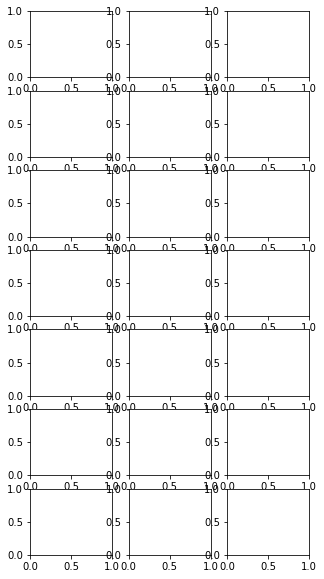

In [346]:
fig, ax = plt.subplots(ncols = 3, nrows = len(methods), figsize = (5, 10))

All_Cells
test
test
Activated_Cells_Only
test
Proliferating_Cells_Only


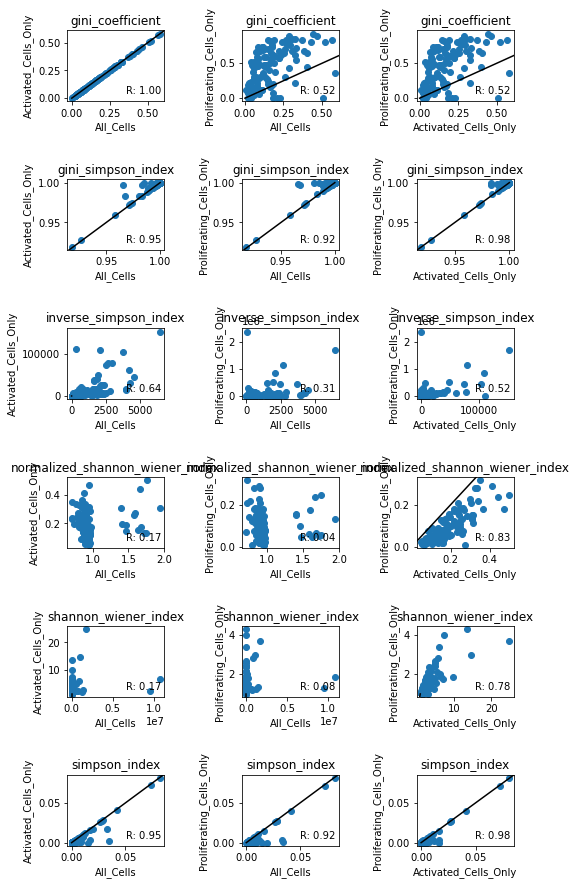

In [364]:
fig, axes = plt.subplots(ncols = 3, nrows = len(methods), figsize = (8, 15), 
                         gridspec_kw = {'hspace' :1.1, 'wspace' : 0.8})

n = 0
for i, t1 in enumerate(df_summary['type'].unique()):
    print(t1)

    for j, t2 in enumerate(df_summary['type'].unique()):
        if j > i:
            
            t1_df = df_summary[df_summary['type']==t1].copy()
            t2_df = df_summary[df_summary['type']==t2].copy()

            t1_df.index = t1_df['sample']
            t2_df.index = t2_df['sample']
            overlap = sorted(set(t1_df.index).intersection(t2_df.index))
            
            for k, method in enumerate(methods):
                x = t1_df.loc[overlap, method]
                y = t2_df.loc[overlap, method]
                r, _ = pearsonr(x, y)

                
                ax = axes[k, n]
                ax.scatter(x = x, y = y)
                xlims = ax.get_xlim()
                ylims = ax.get_ylim()
                ax.text(x = .6, y = 0.1, s = 'R: %.2f' % r, transform=ax.transAxes)

                ax.plot([0, 1], [0, 1], color = 'black')
                ax.set_xlim(xlims)
                ax.set_ylim(ylims)
                ax.set_title(method)
                ax.set_xlabel(t1)
                ax.set_ylabel(t2)

            print('test')
            n+=1

In [307]:
df_summary

,type,sample,shannon_wiener_index,normalized_shannon_wiener_index,simpson_index,inverse_simpson_index,gini_simpson_index,D50_index,gini_coefficient
0,All_Cells,G05061,1655.236147,0.940610,0.000650,1538.199439,0.999350,46.348846,0.113569
1,All_Cells,G05064,3464.883056,0.949708,0.000268,3734.312633,0.999732,49.765698,0.054227
2,All_Cells,G05073,2198.848302,0.923144,0.001355,738.260508,0.998645,40.690151,0.189214
3,All_Cells,G05077,1056.255091,0.916855,0.001869,535.026020,0.998131,42.950655,0.170632
4,All_Cells,G05078,3185.693995,0.949259,0.000234,4278.478339,0.999766,49.051601,0.068597
...,...,...,...,...,...,...,...,...,...
115,Proliferating_Cells_Only,U00607,1.267669,0.132373,0.000459,2177.777778,0.999541,NaN,0.119048
116,Proliferating_Cells_Only,U00613,1.725611,0.179201,0.001300,769.137778,0.998700,NaN,0.439716
117,Proliferating_Cells_Only,U00617,1.278211,0.095698,0.001161,861.120603,0.998839,NaN,0.591716
118,Proliferating_Cells_Only,U00619,1.572808,0.114063,0.000350,2855.246719,0.999650,NaN,0.298946


## Clone size comparisons

### All cell types

In [463]:
meta['TCR_clone_count'].max()

1388.0

In [465]:
individual_col

'COMBAT_ID'

In [470]:
# sums = pd.crosstab(meta['TCR_clone_ID'], meta[individual_col])

In [477]:
len(meta['TCR_clone_ID'].unique())

311296

In [484]:
meta[['TCR_clone_ID', individual_col]].drop_duplicates().shape[0]

312460

In [493]:
meta['TCR_clone_ID_sample'] = meta[individual_col] + '_' + meta['TCR_clone_ID']

In [494]:
len(meta['TCR_clone_ID_sample'].unique())

312339

In [506]:
num_cloneids = meta['TCR_clone_ID_sample'].value_counts().reset_index()
num_cloneids.columns = ['TCR_clone_ID_sample', 'TCR_clone_count_sample']

num_cloneids = pd.merge(meta['TCR_clone_ID_sample'].reset_index(), 
         num_cloneids, on = 'TCR_clone_ID_sample', how = 'left')

num_cloneids.index = num_cloneids['index']

In [518]:
meta['TCR_clone_count_sample'] = num_cloneids.loc[meta.index, 'TCR_clone_count_sample']

In [519]:
num_cloneids

,index,TCR_clone_ID_sample,TCR_clone_count_sample
index,,,
AAACCTGAGCGGATCA-1-gPlexA1,AAACCTGAGCGGATCA-1-gPlexA1,S00112_TRA_CAVGDQTGANNLFF-TRB_CASSLRSGTSYF,51.0
AAACCTGCAGCTCGAC-1-gPlexA1,AAACCTGCAGCTCGAC-1-gPlexA1,S00005_TRA_CADNFNKFYF-TRB_CASSESPGHSPLHF,1.0
AAACCTGCATCTATGG-1-gPlexA1,AAACCTGCATCTATGG-1-gPlexA1,H00067_TRA_CAVREAAGNKLTF-TRB_CASSEQGSSYEQYF,3.0
AAACCTGGTCTCTCTG-1-gPlexA1,AAACCTGGTCTCTCTG-1-gPlexA1,N00027_TRA_CAAIILKAGNNRKLIW-TRB_CASSLPGQISSSYTF,1.0
AAACCTGTCACCGGGT-1-gPlexA1,AAACCTGTCACCGGGT-1-gPlexA1,U00515_TRA_CAMTPGGGADGLTF-TRB_CASGIGGLGNTEAFF,37.0
...,...,...,...
TTTGGTTTCCTCAACC-1-gPlexK7,TTTGGTTTCCTCAACC-1-gPlexK7,S00048_TRA_CAVDMKVYSGGGADGLTF-TRB_CSAPRLAGGWWE...,1.0
TTTGGTTTCTCGATGA-1-gPlexK7,TTTGGTTTCTCGATGA-1-gPlexK7,N00038_TRA_CARWAGGFKTIF-TRB_CASSSPGLGDEQFF,1.0
TTTGTCACACCACGTG-1-gPlexK7,TTTGTCACACCACGTG-1-gPlexK7,S00057_TRA_CAFEPNSGYALNF-TRB_CASSPETYEQYF,1.0


In [498]:
print('test')

test


In [500]:
(meta['TCR_clone_ID_sample'].value_counts()>1).value_counts()

False    300182
True      12156
Name: TCR_clone_ID_sample, dtype: int64

Text(0, 0.5, 'Clone Size')

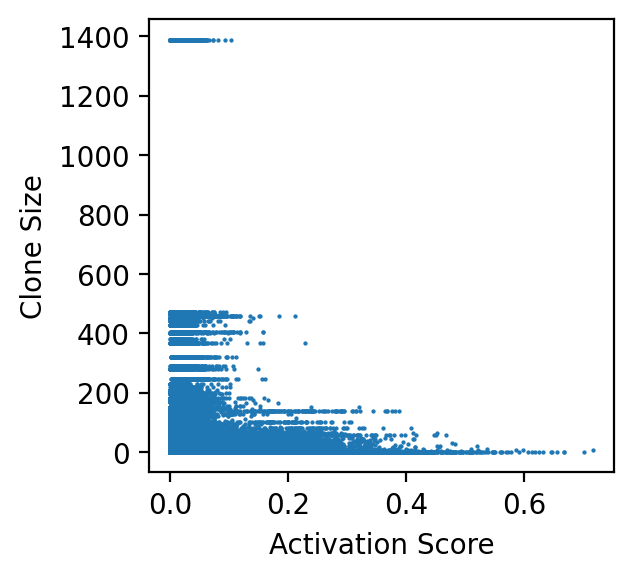

In [381]:
fig, ax = plt.subplots(dpi = 200, figsize = (3, 3))
x = activation_score[meta.index] 
y = meta['TCR_clone_count']
ax.scatter(x = x, y = y, s = 0.3)
ax.set_xlabel('Activation Score')
ax.set_ylabel('Clone Size')

Text(0, 0.5, 'Clone Size')

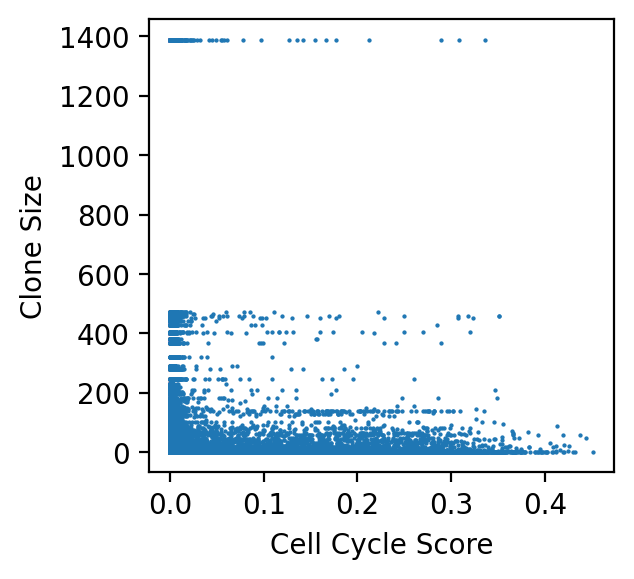

In [382]:
fig, ax = plt.subplots(dpi = 200, figsize = (3, 3))
x = cc_score[meta.index] 
y = meta['TCR_clone_count']
ax.scatter(x = x, y = y, s = 0.3)
ax.set_xlabel('Cell Cycle Score')
ax.set_ylabel('Clone Size')

Text(0, 0.5, 'Clone Size')

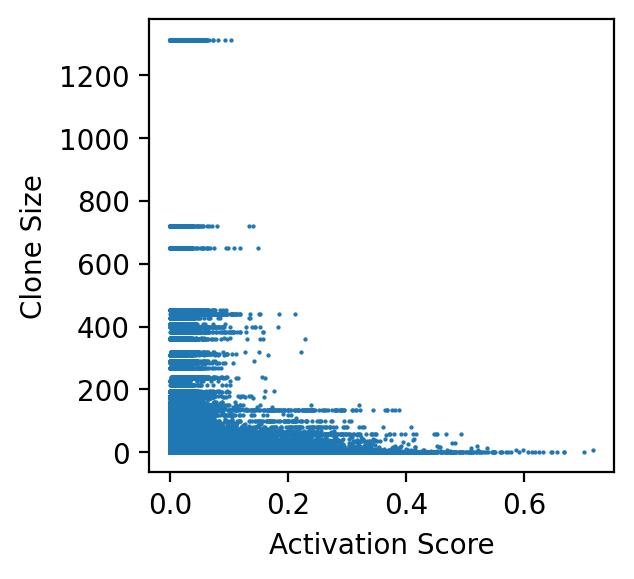

In [520]:
fig, ax = plt.subplots(dpi = 200, figsize = (3, 3))
x = activation_score[meta.index] 
y = meta['TCR_clone_count_sample']
ax.scatter(x = x, y = y, s = 0.3)
ax.set_xlabel('Activation Score')
ax.set_ylabel('Clone Size')

Text(0, 0.5, 'Clone Size')

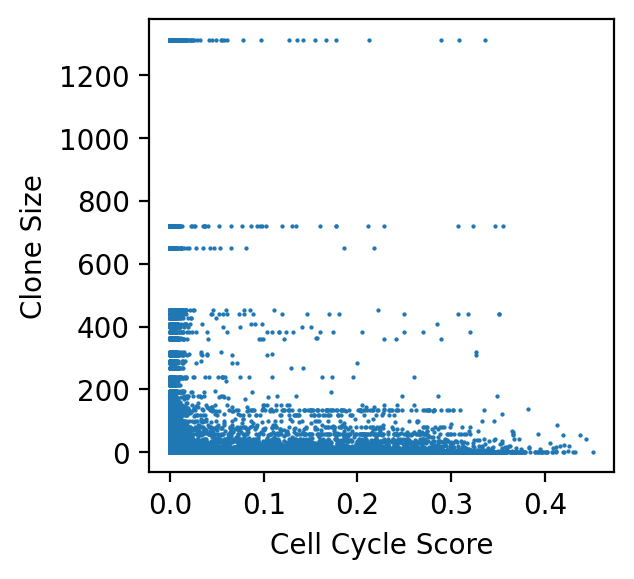

In [521]:
fig, ax = plt.subplots(dpi = 200, figsize = (3, 3))
x = cc_score[meta.index] 
y = meta['TCR_clone_count_sample']
ax.scatter(x = x, y = y, s = 0.3)
ax.set_xlabel('Cell Cycle Score')
ax.set_ylabel('Clone Size')

In [383]:
activated_cells

AAACCTGAGCGGATCA-1-gPlexA1    False
AAACCTGCAGCTCGAC-1-gPlexA1    False
AAACCTGCATCTATGG-1-gPlexA1    False
AAACCTGGTCTCTCTG-1-gPlexA1     True
AAACCTGTCACCGGGT-1-gPlexA1     True
                              ...  
TTTGGTTTCCTCAACC-1-gPlexK7    False
TTTGGTTTCTCGATGA-1-gPlexK7    False
TTTGTCACACCACGTG-1-gPlexK7    False
TTTGTCAGTTACCGAT-1-gPlexK7    False
TTTGTCATCCTCTAGC-1-gPlexK7    False
Name: Activation_Status, Length: 399599, dtype: bool

<AxesSubplot:xlabel='Activation_Status', ylabel='TCR_clone_count'>

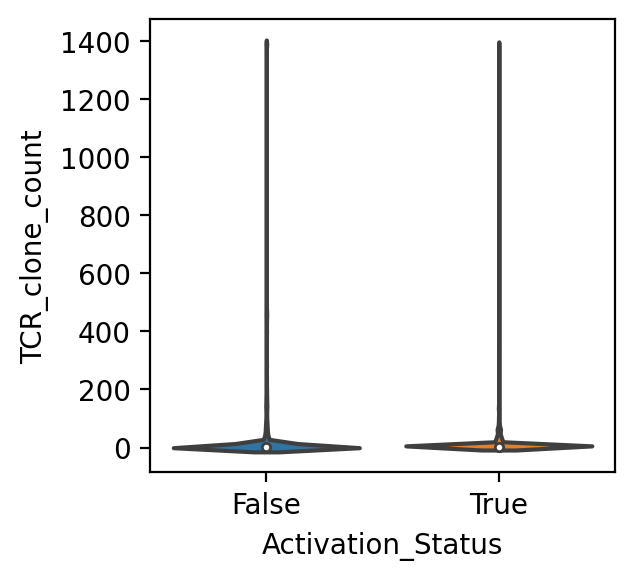

In [388]:
fig, ax = plt.subplots(dpi = 200, figsize = (3, 3))
sns.violinplot(x = activated_cells[meta.index], y =  meta['TCR_clone_count'], scale = 'width')

<AxesSubplot:ylabel='TCR_clone_count'>

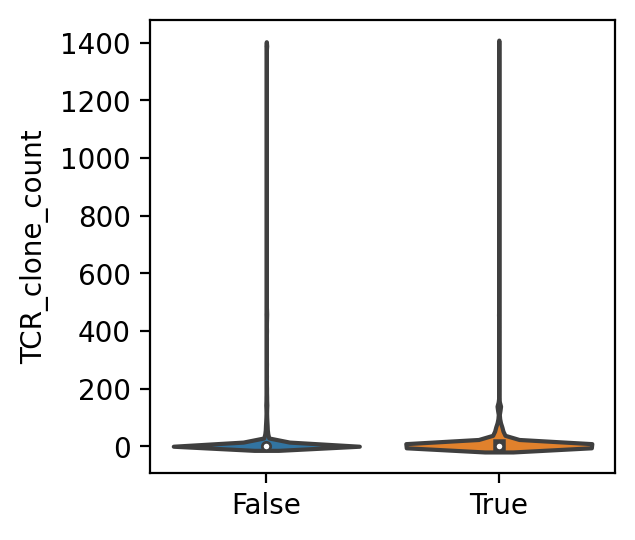

In [387]:
fig, ax = plt.subplots(dpi = 200, figsize = (3, 3))
sns.violinplot(x = prolif_cells[meta.index], y =  meta['TCR_clone_count'], scale = 'width')

### By lineage

In [395]:
gating_act['Class'].value_counts()

CD4      268885
CD8      105358
Other     26682
Name: Class, dtype: int64

In [425]:
from scipy.stats import ranksums

In [435]:
ind_lin[activated_cells[ind_lin]]

Index(['AAACGGGTCTCTTGAT-1-gPlexA1', 'AAAGATGGTCATGCAT-1-gPlexA1',
       'AACTGGTAGGAGTTTA-1-gPlexA1', 'ACATGGTCACACAGAG-1-gPlexA1',
       'ACCAGTACACGGTGTC-1-gPlexA1', 'ACGCCGATCCTCCTAG-1-gPlexA1',
       'ACGGGTCAGGATGTAT-1-gPlexA1', 'ACTGTCCTCCTACAGA-1-gPlexA1',
       'ACTTGTTTCCAGATCA-1-gPlexA1', 'AGAGCGAAGCGTGAAC-1-gPlexA1',
       ...
       'GTCAAGTTCGGCCGAT-1-gPlexK7', 'GTCGTAATCACCGGGT-1-gPlexK7',
       'GTGTTAGAGTCGAGTG-1-gPlexK7', 'GTTCATTGTGCAGGTA-1-gPlexK7',
       'TAAGTGCAGTCCAGGA-1-gPlexK7', 'TACACGAAGACCTTTG-1-gPlexK7',
       'TACTTACCAATCAGAA-1-gPlexK7', 'TGAAAGACAAGGACAC-1-gPlexK7',
       'TGAGCCGTCTGCGTAA-1-gPlexK7', 'TTCTTAGTCATGCATG-1-gPlexK7'],
      dtype='object', length=2573)

In [453]:
overlap = gating_act['Class'].index.intersection(meta.index)

<AxesSubplot:xlabel='Class', ylabel='TCR_clone_count'>

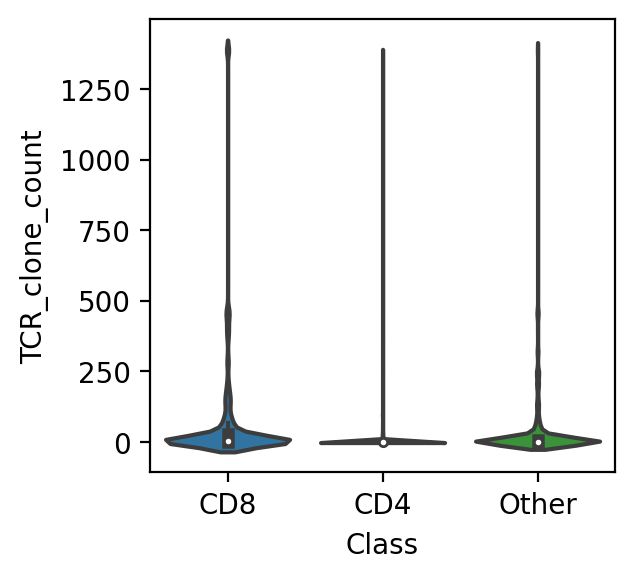

In [454]:
fig, ax = plt.subplots(dpi = 200, figsize = (3, 3))
sns.violinplot(x = gating_act['Class'][overlap], y =  meta.loc[overlap, 'TCR_clone_count'], scale = 'width')
# ax.set_title(lineage)



CD4


RanksumsResult(statistic=13.83825262216846, pvalue=1.4980400408697105e-43)

RanksumsResult(statistic=11.359841628277957, pvalue=6.62646555414363e-30)

CD8


RanksumsResult(statistic=0.8824849653896613, pvalue=0.3775146065612994)

RanksumsResult(statistic=-4.1020954809250885, pvalue=4.094252430618885e-05)

Other


RanksumsResult(statistic=-9.33201745232657, pvalue=1.0387457157553032e-20)

RanksumsResult(statistic=-8.739341268420908, pvalue=2.344735746349361e-18)

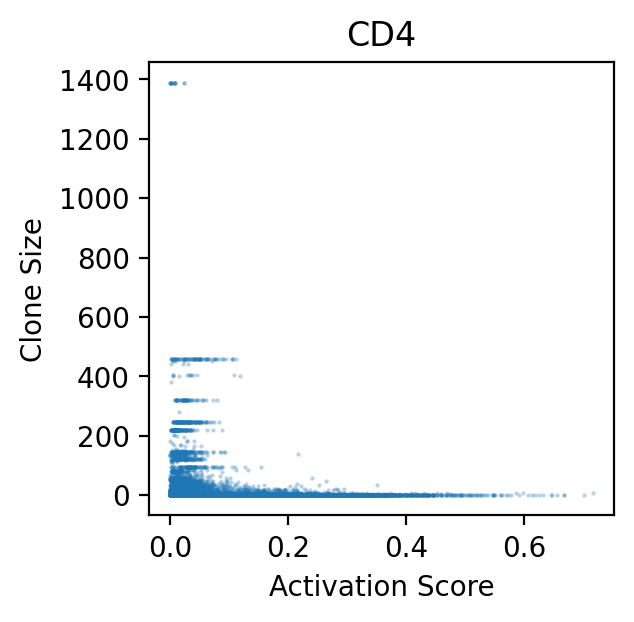

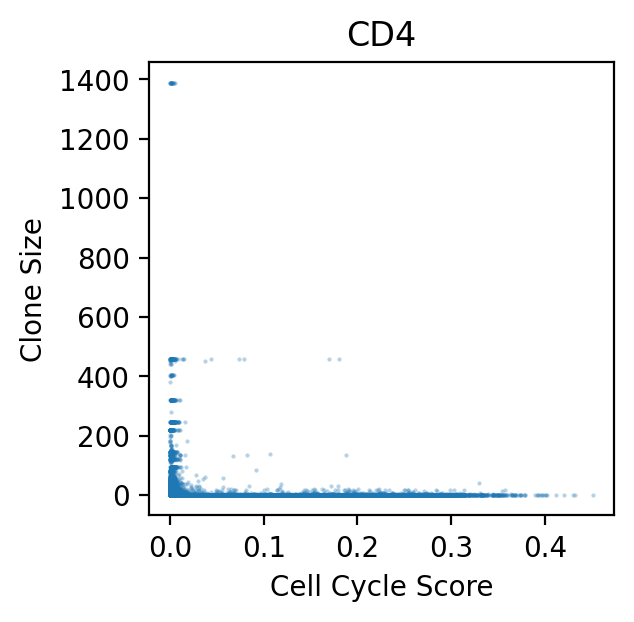

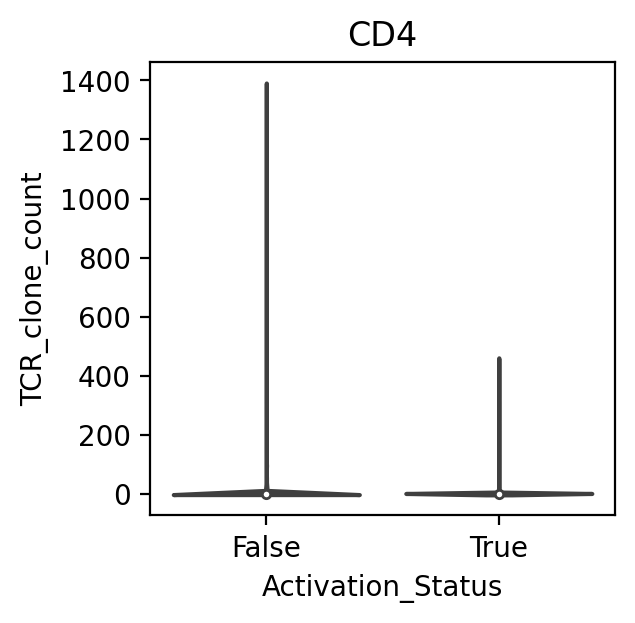

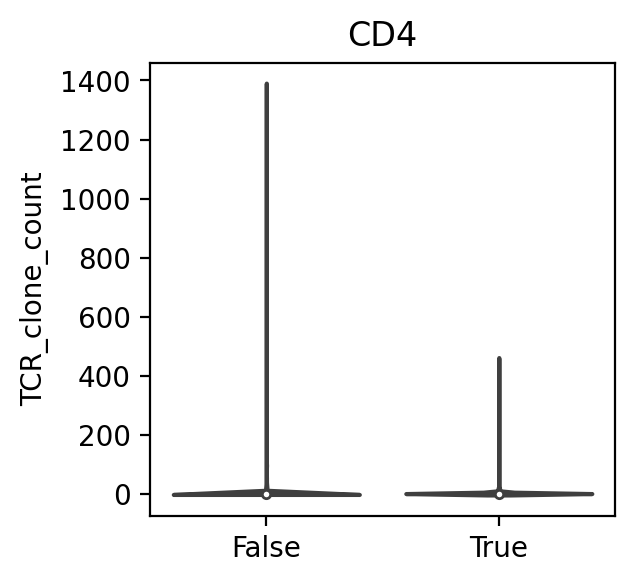

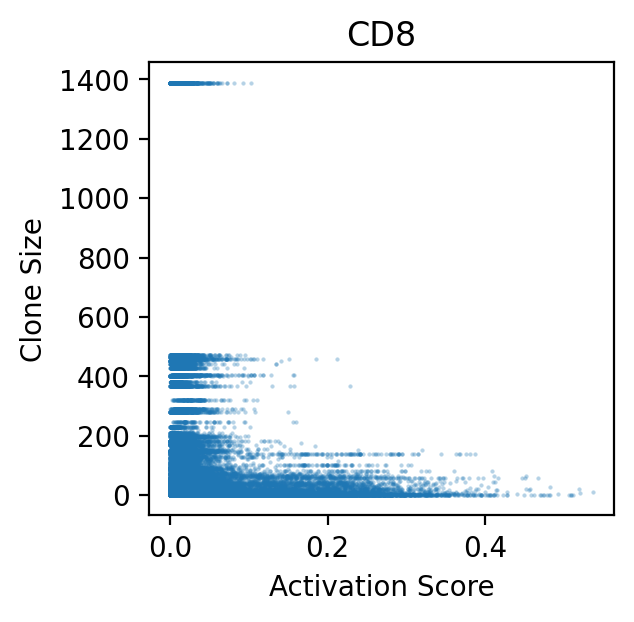

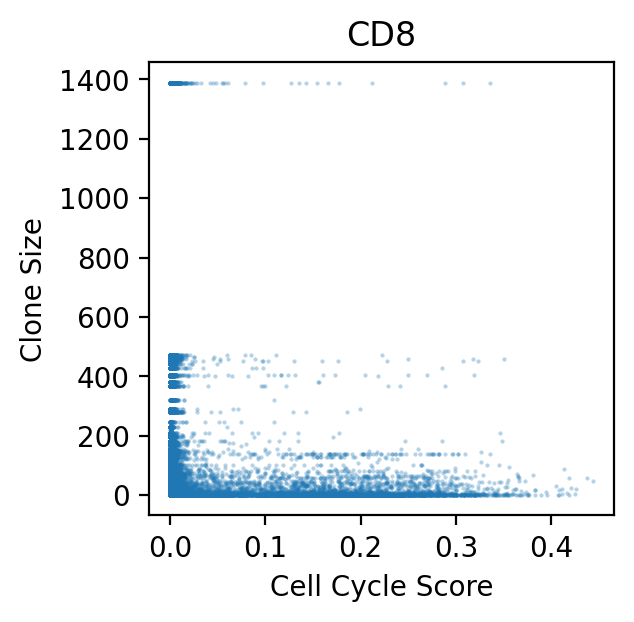

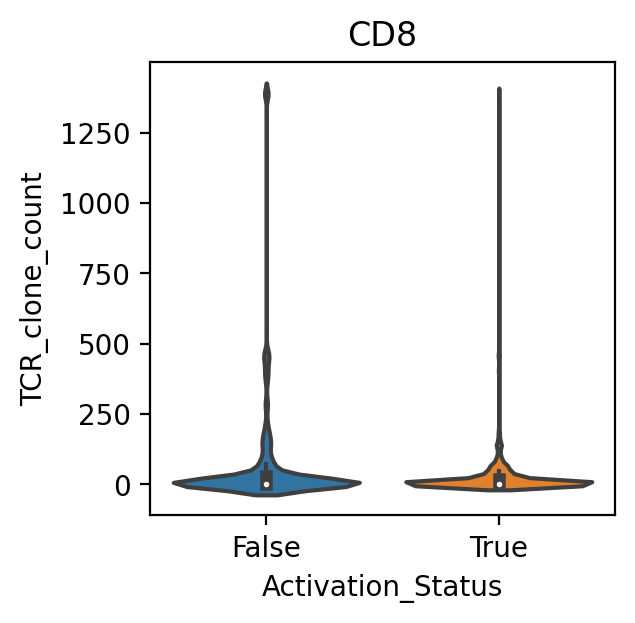

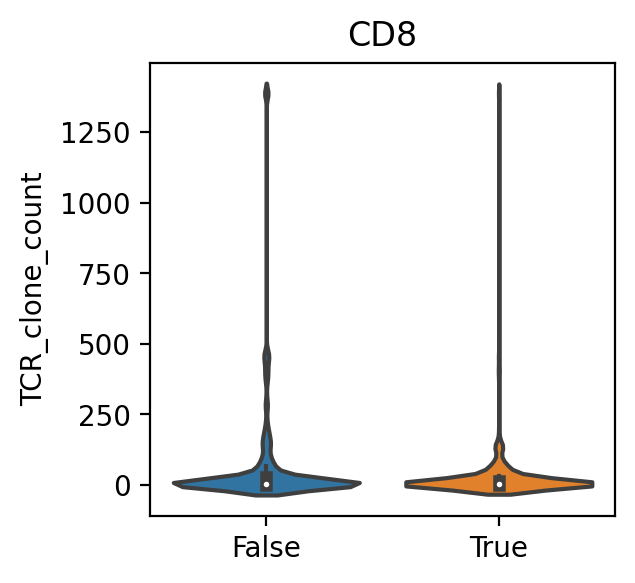

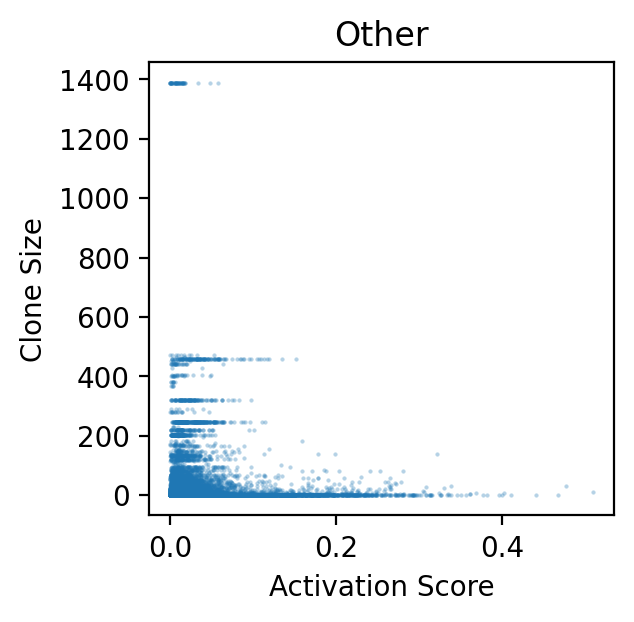

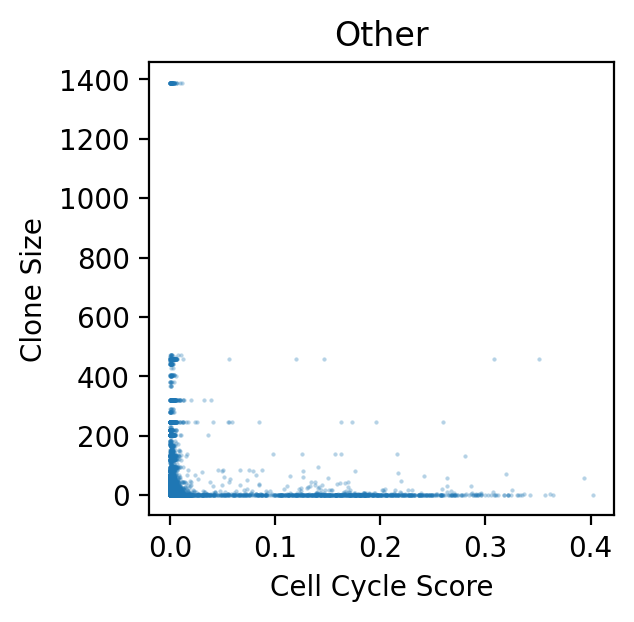

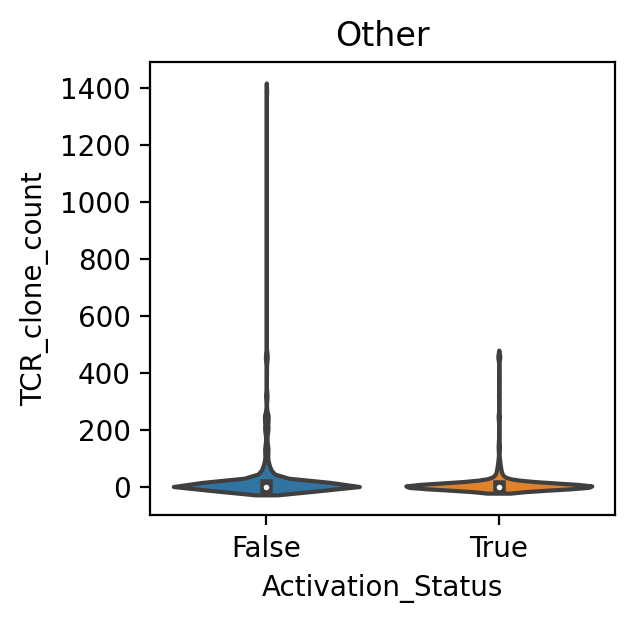

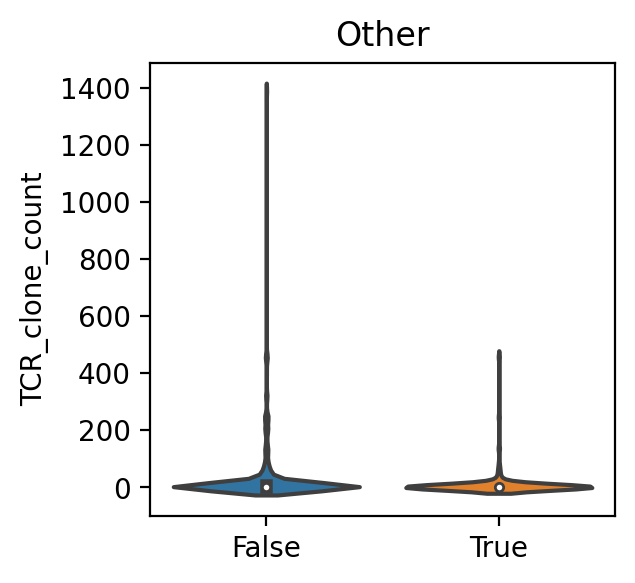

In [450]:
for lineage in ['CD4', 'CD8', 'Other']:
    print(lineage)

    ind_lin = gating_act[gating_act['Class']==lineage].index
    ind_lin = ind_lin.intersection(meta.index)

    fig, ax = plt.subplots(dpi = 200, figsize = (3, 3))
    x = activation_score[ind_lin] 
    y = meta.loc[ind_lin, 'TCR_clone_count']
    ax.scatter(x = x, y = y, s = 0.3, alpha = 0.3)
    ax.set_xlabel('Activation Score')
    ax.set_ylabel('Clone Size')
    ax.set_title(lineage)

    fig, ax = plt.subplots(dpi = 200, figsize = (3, 3))
    x = cc_score[ind_lin] 
    y = meta.loc[ind_lin, 'TCR_clone_count']
    ax.scatter(x = x, y = y, s = 0.3, alpha = 0.3)
    ax.set_xlabel('Cell Cycle Score')
    ax.set_ylabel('Clone Size')
    ax.set_title(lineage)

    fig, ax = plt.subplots(dpi = 200, figsize = (3, 3))
    sns.violinplot(x = activated_cells[ind_lin], y =  meta.loc[ind_lin, 'TCR_clone_count'], scale = 'width')
    ax.set_title(lineage)

    fig, ax = plt.subplots(dpi = 200, figsize = (3, 3))
    sns.violinplot(x = prolif_cells[ind_lin], y =  meta.loc[ind_lin, 'TCR_clone_count'], scale = 'width')
    ax.set_title(lineage)
    
    
    # Test enrichment of clone size in activated vs unactivated
    a = meta.loc[ind_lin[activated_cells[ind_lin]], 
         'TCR_clone_count'].dropna()
    b = meta.loc[ind_lin[-activated_cells[ind_lin]], 
             'TCR_clone_count'].dropna()
    display(ranksums(a, b))
    
    # Test enrichment of clone size in prolif vs non-prolif
    a = meta.loc[ind_lin[prolif_cells[ind_lin]], 
             'TCR_clone_count'].dropna()
    b = meta.loc[ind_lin[-prolif_cells[ind_lin]], 
             'TCR_clone_count'].dropna()
    display(ranksums(a, b))

In [456]:
individual_col

'COMBAT_ID'

In [457]:
a = meta.loc[ind_lin[activated_cells[ind_lin]], 
     'TCR_clone_count'].dropna()
b = meta.loc[ind_lin[-activated_cells[ind_lin]], 
         'TCR_clone_count'].dropna()


In [460]:
meta.loc[ind_lin[-activated_cells[ind_lin]], individual_col]

AAACCTGTCCTTGCCA-1-gPlexA1    G05064
AAAGATGGTAGCTGCC-1-gPlexA1    H00067
AAAGATGTCCGTACAA-1-gPlexA1    H00067
AAAGCAAGTCAAACTC-1-gPlexA1    S00028
AAAGTAGAGGAGTTTA-1-gPlexA1    U00515
                               ...  
TTGCGTCAGCGCCTCA-1-gPlexK7    S00072
TTGCGTCCATGGTTGT-1-gPlexK7    N00038
TTGGAACAGTTAGGTA-1-gPlexK7    S00082
TTGGCAAAGCGAAGGG-1-gPlexK7    S00048
TTTCCTCTCTACTTAC-1-gPlexK7    S00076
Name: COMBAT_ID, Length: 23992, dtype: object

CD4


RanksumsResult(statistic=13.83825262216846, pvalue=1.4980400408697105e-43)

RanksumsResult(statistic=11.359841628277957, pvalue=6.62646555414363e-30)

CD8


RanksumsResult(statistic=0.8824849653896613, pvalue=0.3775146065612994)

RanksumsResult(statistic=-4.1020954809250885, pvalue=4.094252430618885e-05)

Other


RanksumsResult(statistic=-9.33201745232657, pvalue=1.0387457157553032e-20)

RanksumsResult(statistic=-8.739341268420908, pvalue=2.344735746349361e-18)

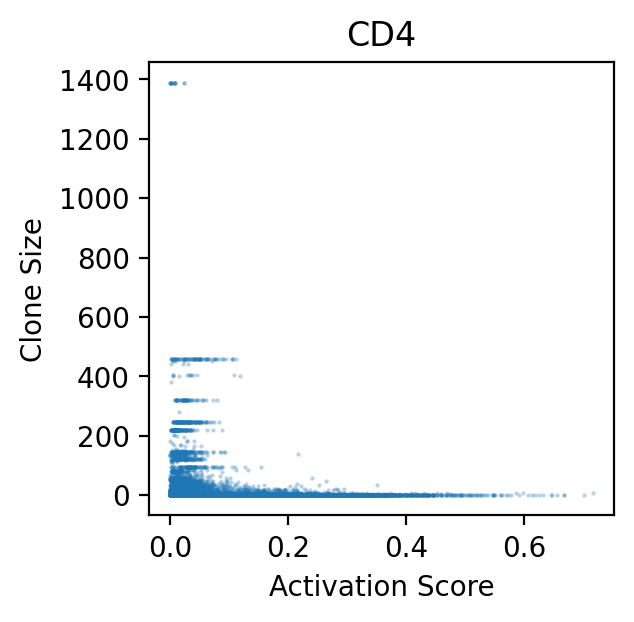

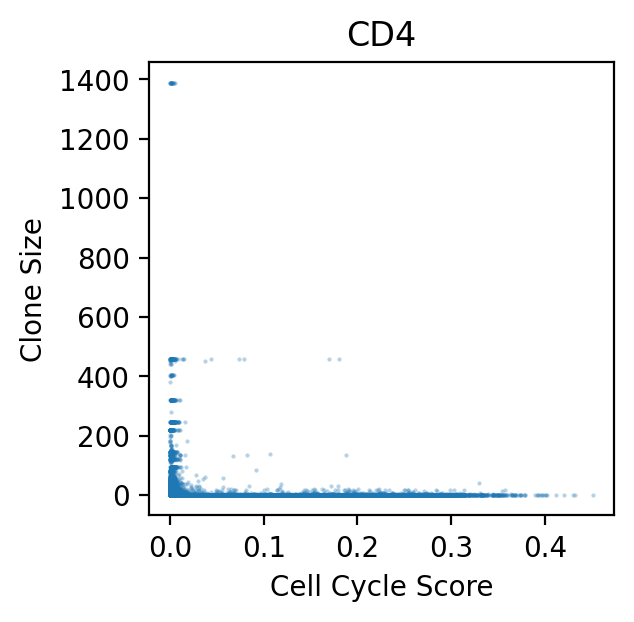

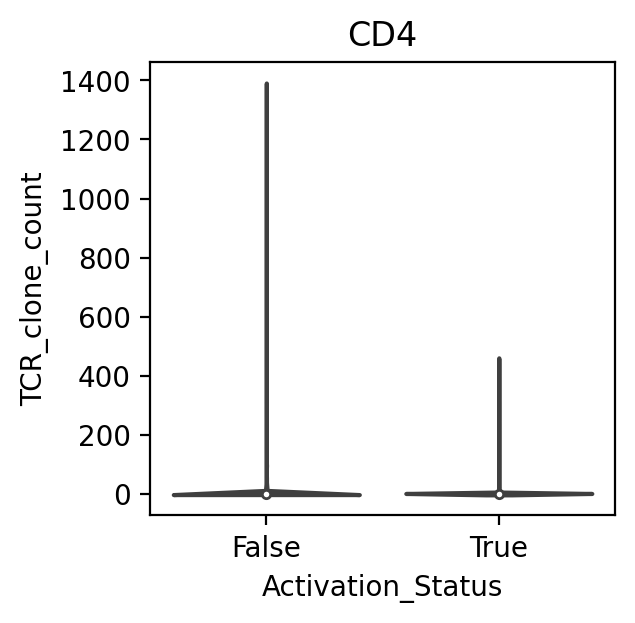

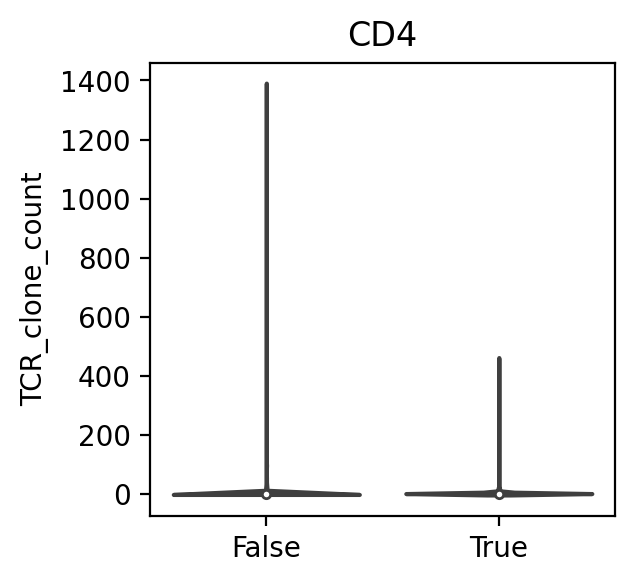

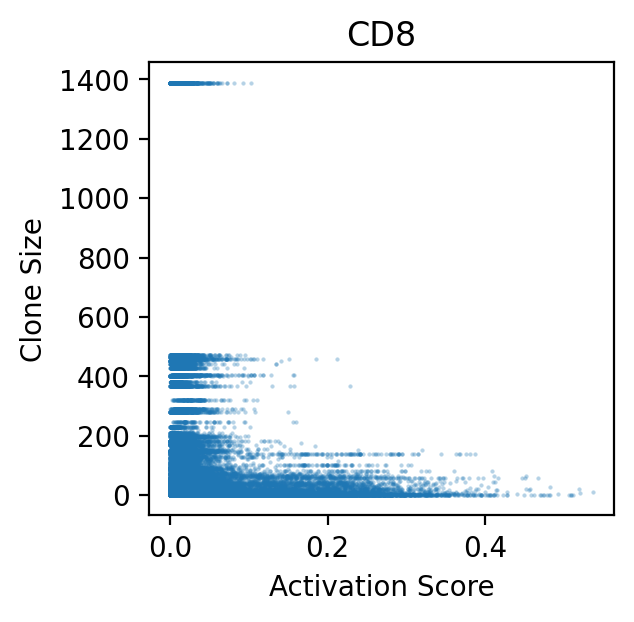

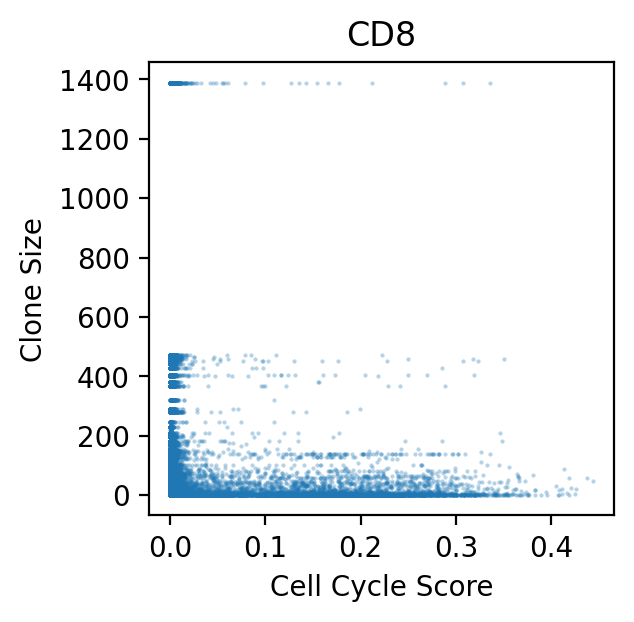

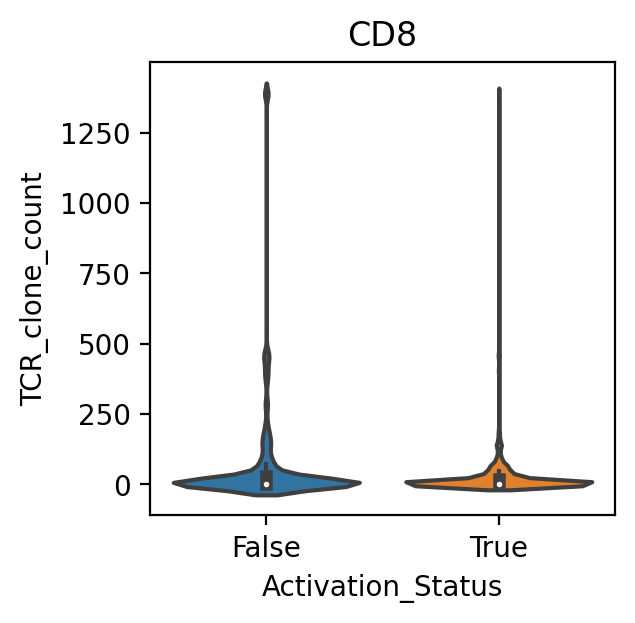

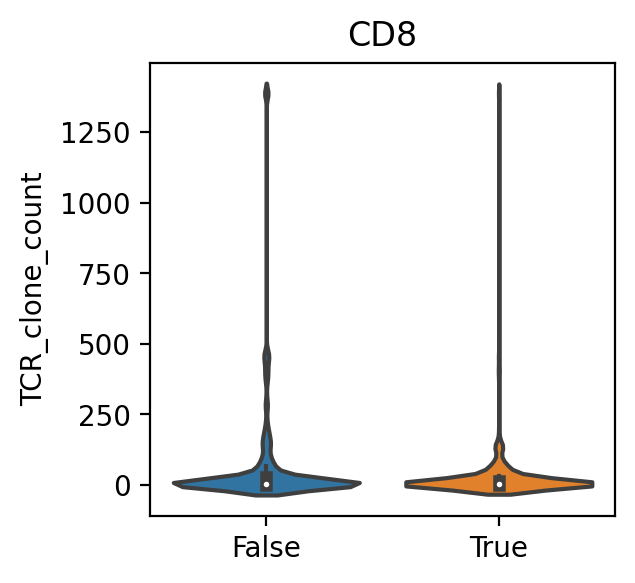

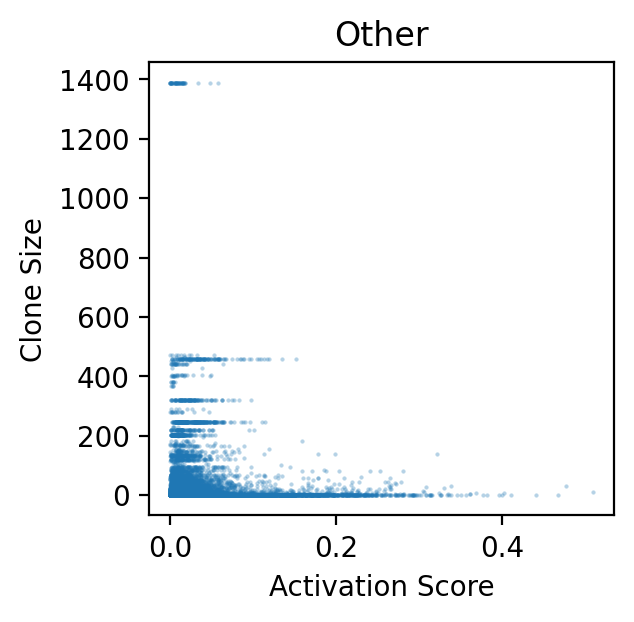

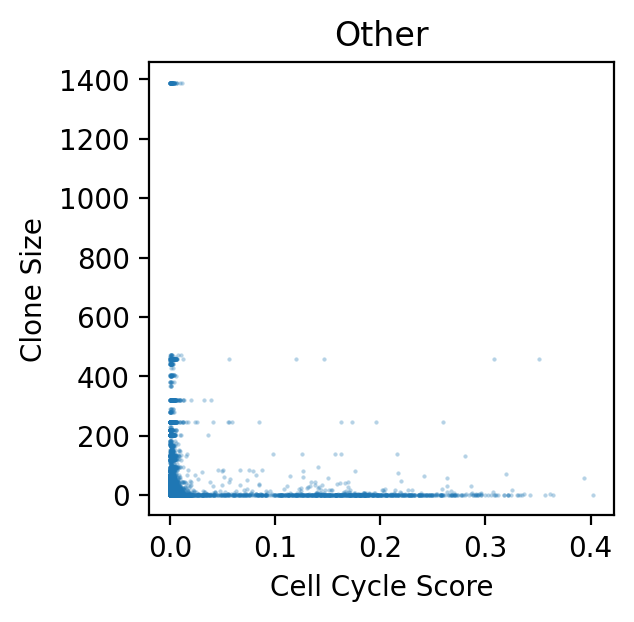

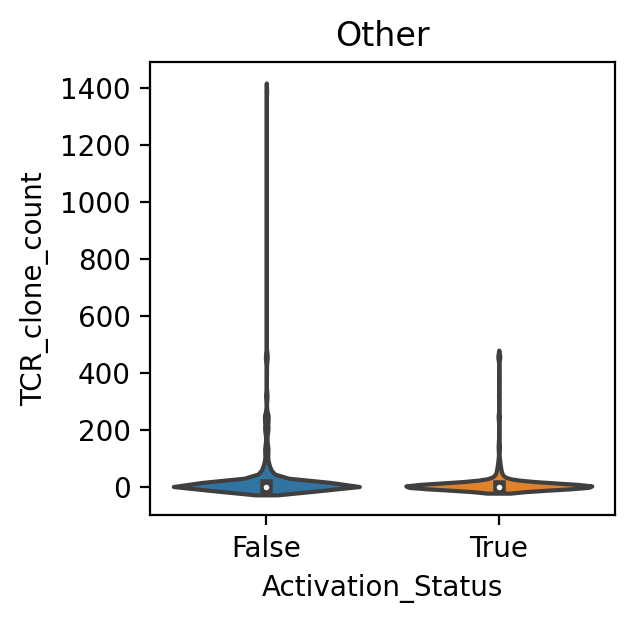

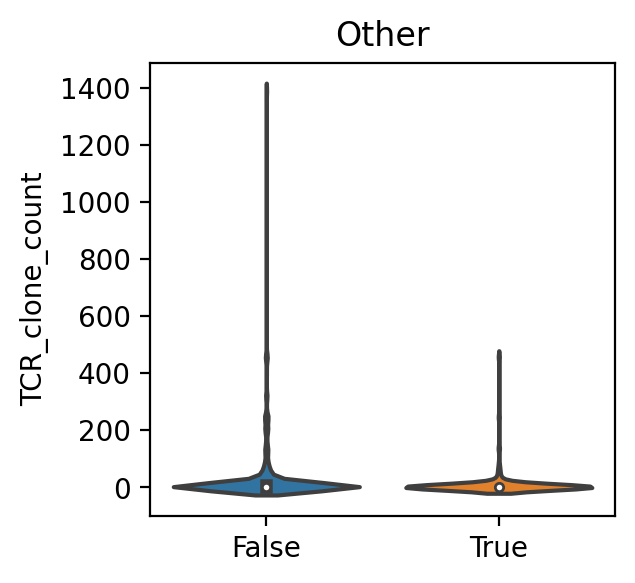

In [450]:
for lineage in ['CD4', 'CD8', 'Other']:
    print(lineage)

    ind_lin = gating_act[gating_act['Class']==lineage].index
    ind_lin = ind_lin.intersection(meta.index)

    fig, ax = plt.subplots(dpi = 200, figsize = (3, 3))
    x = activation_score[ind_lin] 
    y = meta.loc[ind_lin, 'TCR_clone_count']
    ax.scatter(x = x, y = y, s = 0.3, alpha = 0.3)
    ax.set_xlabel('Activation Score')
    ax.set_ylabel('Clone Size')
    ax.set_title(lineage)

    fig, ax = plt.subplots(dpi = 200, figsize = (3, 3))
    x = cc_score[ind_lin] 
    y = meta.loc[ind_lin, 'TCR_clone_count']
    ax.scatter(x = x, y = y, s = 0.3, alpha = 0.3)
    ax.set_xlabel('Cell Cycle Score')
    ax.set_ylabel('Clone Size')
    ax.set_title(lineage)

    fig, ax = plt.subplots(dpi = 200, figsize = (3, 3))
    sns.violinplot(x = activated_cells[ind_lin], y =  meta.loc[ind_lin, 'TCR_clone_count'], scale = 'width')
    ax.set_title(lineage)

    fig, ax = plt.subplots(dpi = 200, figsize = (3, 3))
    sns.violinplot(x = prolif_cells[ind_lin], y =  meta.loc[ind_lin, 'TCR_clone_count'], scale = 'width')
    ax.set_title(lineage)
    
    
    # Test enrichment of clone size in activated vs unactivated
    a = meta.loc[ind_lin[activated_cells[ind_lin]], 
         'TCR_clone_count'].dropna()
    b = meta.loc[ind_lin[-activated_cells[ind_lin]], 
             'TCR_clone_count'].dropna()
    display(ranksums(a, b))
    
    # Test enrichment of clone size in prolif vs non-prolif
    a = meta.loc[ind_lin[prolif_cells[ind_lin]], 
             'TCR_clone_count'].dropna()
    b = meta.loc[ind_lin[-prolif_cells[ind_lin]], 
             'TCR_clone_count'].dropna()
    display(ranksums(a, b))

## UK-Covid

In [34]:
dataset = 'UK-Covid'

In [35]:
count_fn = params.loc[dataset, 'raw_counts_filt_fn']
adata = sc.read(count_fn)

Only considering the two last: ['.ADTfixedADT_70FiltForcNMF', '.h5ad'].
Only considering the two last: ['.ADTfixedADT_70FiltForcNMF', '.h5ad'].


In [36]:
meta_fn = params.loc[dataset, 'metadata_fn']
meta = pd.read_csv(meta_fn, index_col = 0, sep = '\t')

/PHShome/mc1070/anaconda3/envs/cnmf_env2v2/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3524: DtypeWarning: Columns (18,20,21) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [41]:
adata

AnnData object with n_obs × n_vars = 273516 × 24929
    obs: 'sample_id', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'full_clustering', 'initial_clustering', 'Resample', 'Collection_Day', 'Sex', 'Age_interval', 'Swab_result', 'Status', 'Smoker', 'Status_on_day_collection', 'Status_on_day_collection_summary', 'Days_from_onset', 'Site', 'time_after_LPS', 'Worst_Clinical_Status', 'Outcome', 'patient_id', 'pct_mito', 'IEG_GEP_Score', 'n_counts', 'FOS_expr', 'JUN_expr', 'JUNB_expr', 'ZFP36_expr', 'IEG_Usage', 'RNA_Modality_Weight', 'leiden_WNN', 'full_clustering_reduced', 'leiden_WNN_lab', 'leiden_WNN_lab_reduced'
    var: 'feature_types', 'ADT_MI', 'ADT_MI_Rank', 'IEG_Filter', 'IEG_GEP_Score', 'Name', 'Name_ADT_Fixed', 'Gene_ADT_Fixed', 'Clone_ADT_Fixed'

In [38]:
meta.columns

Index(['sample_id', 'n_genes', 'n_genes_by_counts', 'total_counts',
       'total_counts_mt', 'pct_counts_mt', 'full_clustering',
       'initial_clustering', 'Resample', 'Collection_Day', 'Sex',
       'Age_interval', 'Swab_result', 'Status', 'Smoker',
       'Status_on_day_collection', 'Status_on_day_collection_summary',
       'Days_from_onset', 'Site', 'time_after_LPS', 'Worst_Clinical_Status',
       'Outcome', 'patient_id', 'pct_mito', 'IEG_GEP_Score', 'n_counts',
       'FOS_expr', 'JUN_expr', 'JUNB_expr', 'ZFP36_expr', 'IEG_Usage',
       'RNA_Modality_Weight', 'leiden_WNN', 'full_clustering_reduced',
       'leiden_WNN_lab', 'leiden_WNN_lab_reduced', 'leiden'],
      dtype='object')

In [40]:
adata.obs.columns

Index(['sample_id', 'n_genes', 'n_genes_by_counts', 'total_counts',
       'total_counts_mt', 'pct_counts_mt', 'full_clustering',
       'initial_clustering', 'Resample', 'Collection_Day', 'Sex',
       'Age_interval', 'Swab_result', 'Status', 'Smoker',
       'Status_on_day_collection', 'Status_on_day_collection_summary',
       'Days_from_onset', 'Site', 'time_after_LPS', 'Worst_Clinical_Status',
       'Outcome', 'patient_id', 'pct_mito', 'IEG_GEP_Score', 'n_counts',
       'FOS_expr', 'JUN_expr', 'JUNB_expr', 'ZFP36_expr', 'IEG_Usage',
       'RNA_Modality_Weight', 'leiden_WNN', 'full_clustering_reduced',
       'leiden_WNN_lab', 'leiden_WNN_lab_reduced'],
      dtype='object')